# EDA Train

## Librerías

In [135]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd


from toolbox_DS import *
from toolbox_ML import *

## Carga de datos (train_set)

In [136]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,income_missing,age,customes_seniority,Household_members,Total_amount,Total_purchase,Median_amount_purchase,Total_cmp,Total_%_cmp
0,5675,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,...,0,0,55.0,3,2.0,493,22,22.409091,1,0.2
1,5543,1966,Graduation,Together,57811.0,0,1,2013-06-24,49,545,...,0,0,49.0,2,3.0,802,25,32.080000,1,0.2
2,3011,1965,Graduation,Married,69139.0,0,1,2014-01-27,23,86,...,0,0,50.0,1,3.0,227,11,20.636364,0,0.0
3,535,1987,Graduation,Divorced,81361.0,0,0,2014-02-25,18,163,...,0,0,28.0,1,1.0,778,27,28.814815,0,0.0
4,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,0,0,39.0,2,3.0,81,9,9.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,5320,1973,Master,Divorced,44051.0,1,1,2013-01-29,20,79,...,1,0,42.0,2,3.0,171,12,14.250000,0,0.0
1786,2894,1985,Graduation,Single,72903.0,0,0,2013-10-29,74,1067,...,1,0,30.0,2,1.0,2013,21,95.857143,3,0.6
1787,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,...,1,0,45.0,2,1.0,81,5,16.200000,1,0.2
1788,6905,1994,Graduation,Together,80685.0,0,0,2012-08-22,55,241,...,0,0,21.0,3,2.0,1004,21,47.809524,0,0.0


In [137]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1790 non-null   int64  
 1   Year_Birth              1790 non-null   int64  
 2   Education               1790 non-null   object 
 3   Marital_Status          1790 non-null   object 
 4   Income                  1790 non-null   float64
 5   Kidhome                 1790 non-null   int64  
 6   Teenhome                1790 non-null   int64  
 7   Dt_Customer             1790 non-null   object 
 8   Recency                 1790 non-null   int64  
 9   MntWines                1790 non-null   int64  
 10  MntFruits               1790 non-null   int64  
 11  MntMeatProducts         1790 non-null   int64  
 12  MntFishProducts         1790 non-null   int64  
 13  MntSweetProducts        1790 non-null   int64  
 14  MntGoldProds            1790 non-null   

In [138]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status',  
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                        'AcceptedCmp1', 'AcceptedCmp2', 'Complain']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
train_set = train_set.drop(columns='income_missing')


In [139]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1790 entries, 5675 to 6634
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year_Birth              1790 non-null   int64         
 1   Education               1790 non-null   category      
 2   Marital_Status          1790 non-null   category      
 3   Income                  1790 non-null   float64       
 4   Kidhome                 1790 non-null   int64         
 5   Teenhome                1790 non-null   int64         
 6   Dt_Customer             1790 non-null   datetime64[ns]
 7   Recency                 1790 non-null   int64         
 8   MntWines                1790 non-null   int64         
 9   MntFruits               1790 non-null   int64         
 10  MntMeatProducts         1790 non-null   int64         
 11  MntFishProducts         1790 non-null   int64         
 12  MntSweetProducts        1790 non-null   int64     

### Listado features

In [140]:
features_num = train_set.select_dtypes('number').columns
features_cat = train_set.select_dtypes('category').columns
print(features_num)
print(features_cat)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'age', 'customes_seniority', 'Household_members',
       'Total_amount', 'Total_purchase', 'Median_amount_purchase', 'Total_cmp',
       'Total_%_cmp'],
      dtype='object')
Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'],
      dtype='object')


In [141]:
target = 'Response'

# Analisis univariable

### Categóricas

Para Education
*************************


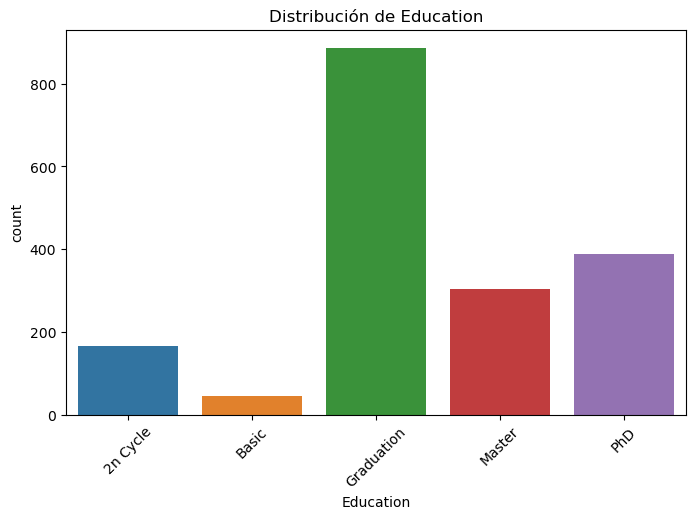

Frecuencia de categorías en Education:
Education
Graduation    886
PhD           389
Master        304
2n Cycle      165
Basic          46
Name: count, dtype: int64

Porcentaje de categorías en Education:
Education
Graduation    49.50
PhD           21.73
Master        16.98
2n Cycle       9.22
Basic          2.57
Name: proportion, dtype: float64

La moda es Graduation con una frecuencia de 886
Proporción de la moda: 49.50%

Para Marital_Status
*************************


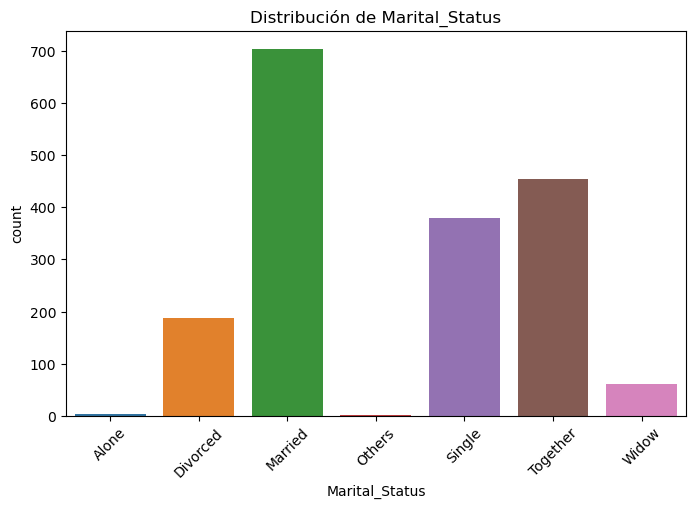

Frecuencia de categorías en Marital_Status:
Marital_Status
Married     703
Together    454
Single      380
Divorced    187
Widow        61
Alone         3
Others        2
Name: count, dtype: int64

Porcentaje de categorías en Marital_Status:
Marital_Status
Married     39.27
Together    25.36
Single      21.23
Divorced    10.45
Widow        3.41
Alone        0.17
Others       0.11
Name: proportion, dtype: float64

La moda es Married con una frecuencia de 703
Proporción de la moda: 39.27%

Para AcceptedCmp3
*************************


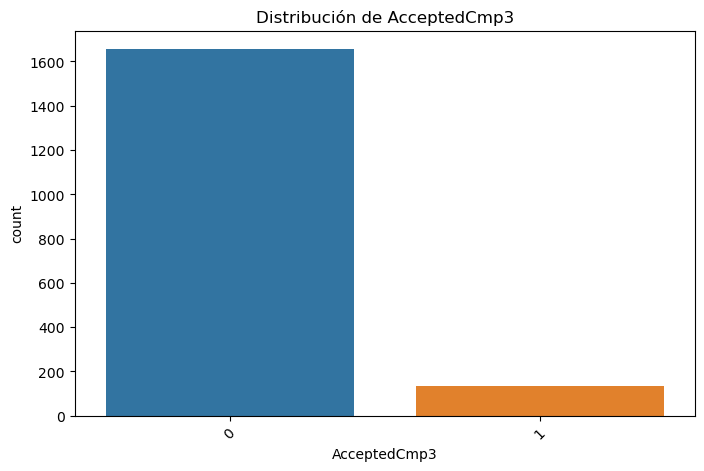

Frecuencia de categorías en AcceptedCmp3:
AcceptedCmp3
0    1657
1     133
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp3:
AcceptedCmp3
0    92.57
1     7.43
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1657
Proporción de la moda: 92.57%

Para AcceptedCmp4
*************************


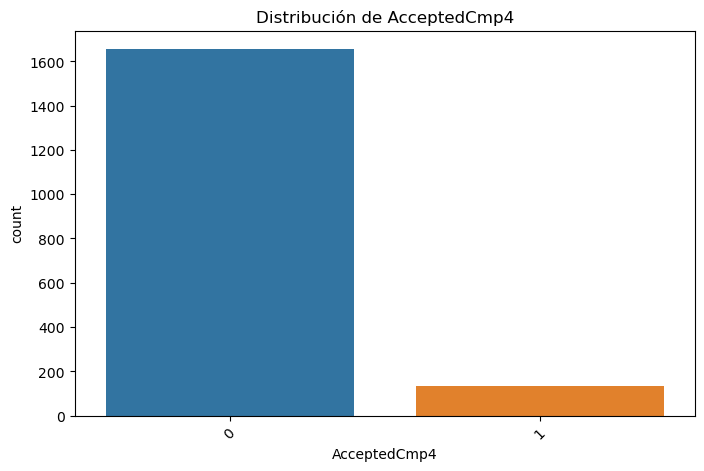

Frecuencia de categorías en AcceptedCmp4:
AcceptedCmp4
0    1656
1     134
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp4:
AcceptedCmp4
0    92.51
1     7.49
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1656
Proporción de la moda: 92.51%

Para AcceptedCmp5
*************************


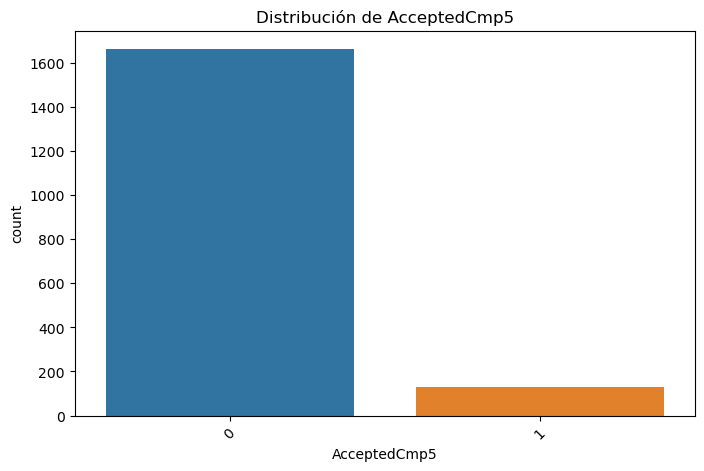

Frecuencia de categorías en AcceptedCmp5:
AcceptedCmp5
0    1662
1     128
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp5:
AcceptedCmp5
0    92.85
1     7.15
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1662
Proporción de la moda: 92.85%

Para AcceptedCmp1
*************************


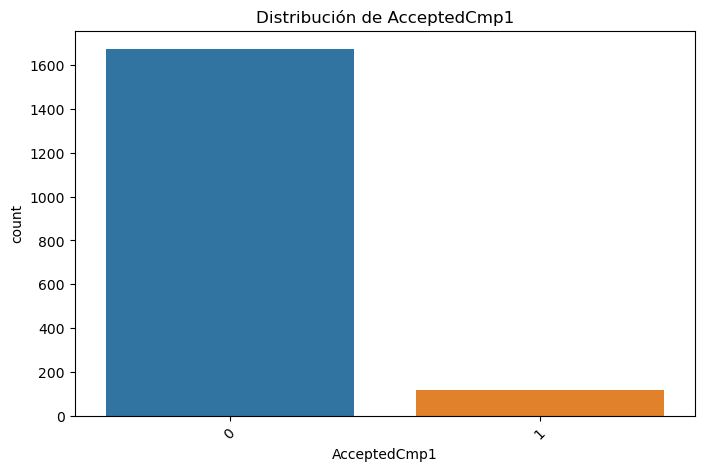

Frecuencia de categorías en AcceptedCmp1:
AcceptedCmp1
0    1674
1     116
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp1:
AcceptedCmp1
0    93.52
1     6.48
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1674
Proporción de la moda: 93.52%

Para AcceptedCmp2
*************************


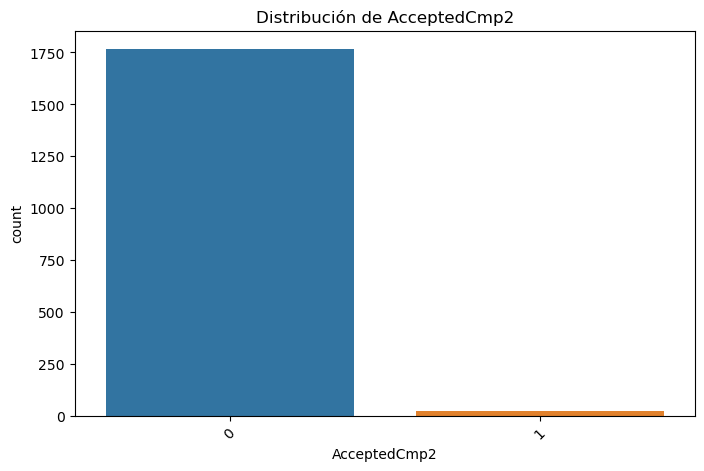

Frecuencia de categorías en AcceptedCmp2:
AcceptedCmp2
0    1767
1      23
Name: count, dtype: int64

Porcentaje de categorías en AcceptedCmp2:
AcceptedCmp2
0    98.72
1     1.28
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1767
Proporción de la moda: 98.72%

Para Complain
*************************


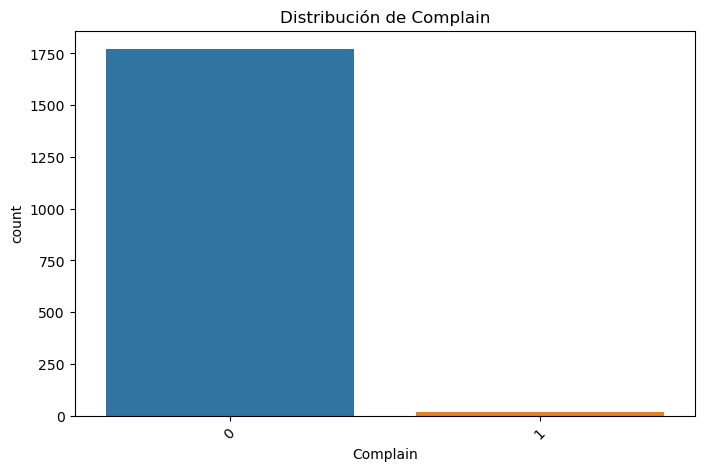

Frecuencia de categorías en Complain:
Complain
0    1771
1      19
Name: count, dtype: int64

Porcentaje de categorías en Complain:
Complain
0    98.94
1     1.06
Name: proportion, dtype: float64

La moda es 0 con una frecuencia de 1771
Proporción de la moda: 98.94%



In [142]:
analisis_univariable_categoricas(train_set,features_cat)

### Numéricas

Para Year_Birth
*************************


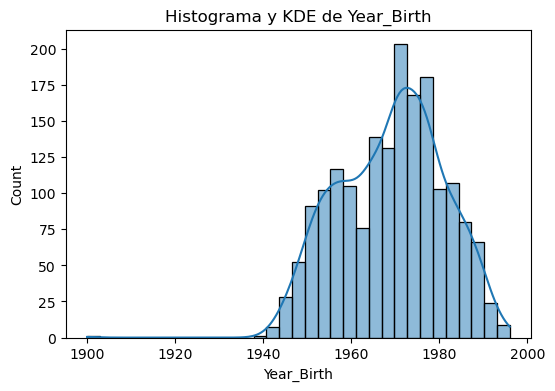

count    1790.00
mean     1969.04
std        11.81
min      1900.00
25%      1960.00
50%      1970.00
75%      1978.00
max      1996.00
Name: Year_Birth, dtype: float64

La moda es 1970.00, el coeficiente de variación es 0.60% y el IQR es 18.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.19. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0003

Prueba Anderson-Darling: estadístico=6.78

Outliers:
Los outliers inferiores son 1 y suponen en proporción 0.06%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Income
*************************


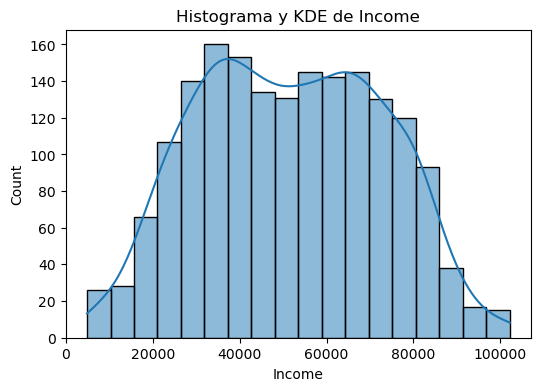

count      1790.00
mean      51615.43
std       21022.95
min        4861.00
25%       34868.75
50%       51268.50
75%       68480.75
max      102160.00
Name: Income, dtype: float64

La moda es 102160.00, el coeficiente de variación es 40.73% y el IQR es 33612.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.83. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=8.33

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Kidhome
*************************


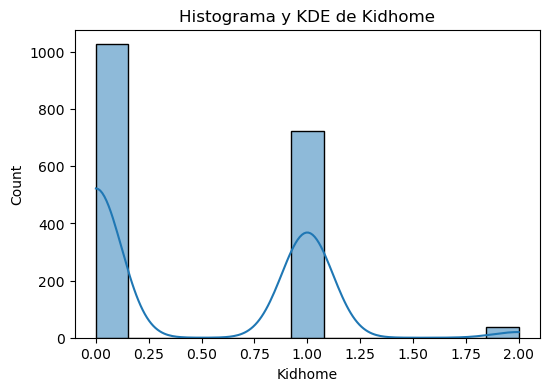

count    1790.00
mean        0.45
std         0.54
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         2.00
Name: Kidhome, dtype: float64

La moda es 0.00, el coeficiente de variación es 120.41% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.62, valores extendidos a la derecha

Curtosis: -0.79. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=282.67

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Teenhome
*************************


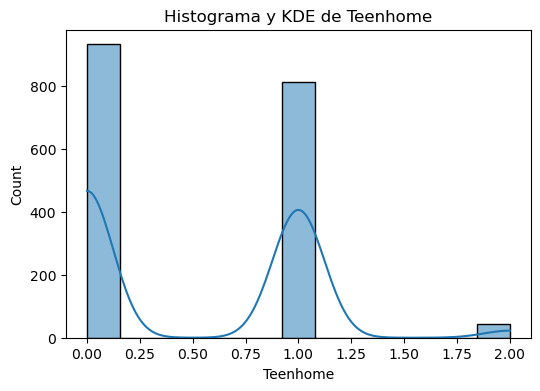

count    1790.00
mean        0.50
std         0.55
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         2.00
Name: Teenhome, dtype: float64

La moda es 0.00, el coeficiente de variación es 108.77% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.93. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=266.23

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Recency
*************************


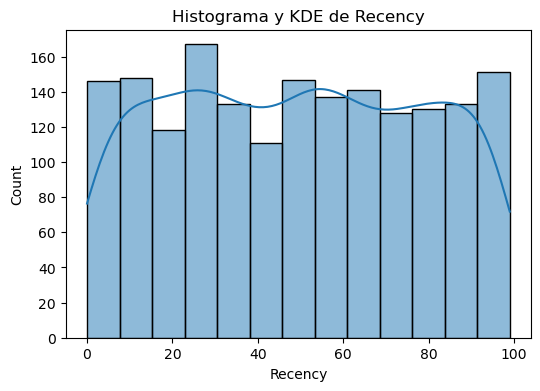

count    1790.00
mean       49.05
std        28.99
min         0.00
25%        24.00
50%        49.00
75%        74.00
max        99.00
Name: Recency, dtype: float64

La moda es 92.00, el coeficiente de variación es 59.11% y el IQR es 50.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -1.20. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=20.25

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para MntWines
*************************


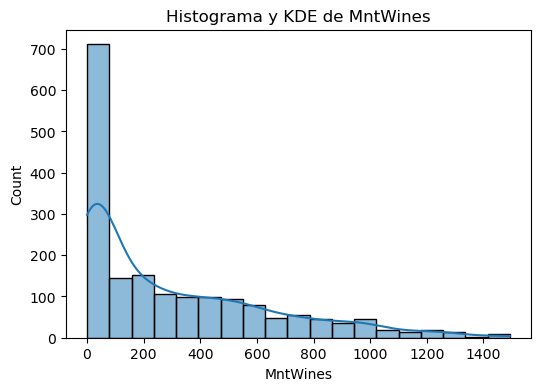

count    1790.00
mean      303.09
std       336.73
min         0.00
25%        24.00
50%       173.00
75%       501.25
max      1493.00
Name: MntWines, dtype: float64

La moda es 5.00, el coeficiente de variación es 111.10% y el IQR es 477.25

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.19, valores extendidos a la derecha

Curtosis: 0.68. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=98.28

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para MntFruits
*************************


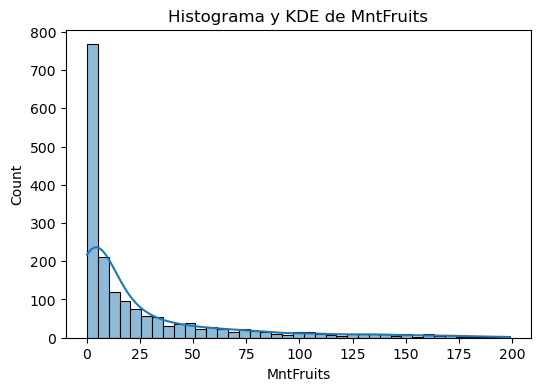

count    1790.00
mean       26.20
std        39.69
min         0.00
25%         2.00
50%         8.00
75%        33.00
max       199.00
Name: MntFruits, dtype: float64

La moda es 0.00, el coeficiente de variación es 151.52% y el IQR es 31.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.11, valores extendidos a la derecha

Curtosis: 4.09. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=201.79

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 85 y suponen en proporción 4.75%

La variable MntFruits puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=4.09, asimetria=2.11

Para MntMeatProducts
*************************


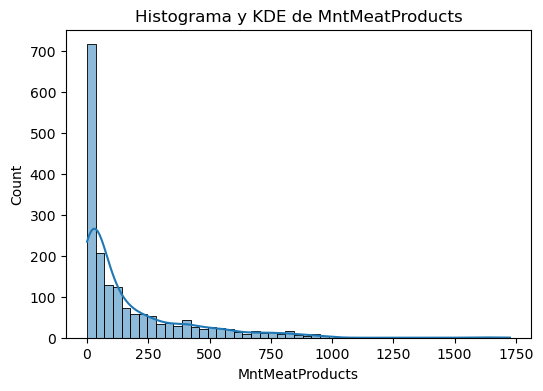

count    1790.00
mean      166.20
std       223.89
min         0.00
25%        16.00
50%        66.00
75%       230.00
max      1725.00
Name: MntMeatProducts, dtype: float64

La moda es 11.00, el coeficiente de variación es 134.71% y el IQR es 214.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.07, valores extendidos a la derecha

Curtosis: 5.44. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=163.05

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 23 y suponen en proporción 1.28%

La variable MntMeatProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=5.44, asimetria=2.07

Para MntFishProducts
*************************


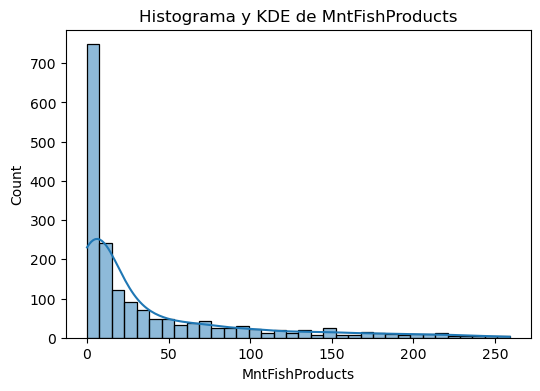

count    1790.00
mean       37.70
std        55.23
min         0.00
25%         3.00
50%        12.00
75%        50.00
max       259.00
Name: MntFishProducts, dtype: float64

La moda es 0.00, el coeficiente de variación es 146.47% y el IQR es 47.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.93, valores extendidos a la derecha

Curtosis: 3.09. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=195.44

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 61 y suponen en proporción 3.41%

La variable MntFishProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.09, asimetria=1.93

Para MntSweetProducts
*************************


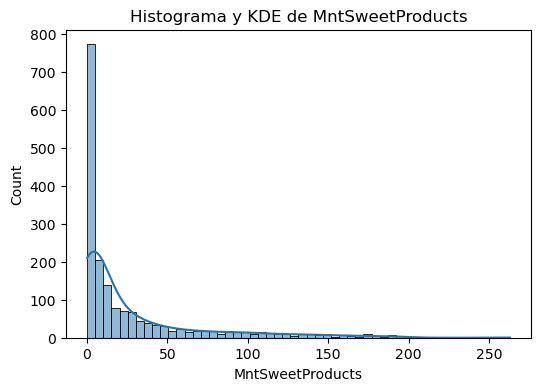

count    1790.00
mean       26.89
std        41.48
min         0.00
25%         1.00
50%         8.00
75%        32.00
max       263.00
Name: MntSweetProducts, dtype: float64

La moda es 0.00, el coeficiente de variación es 154.23% y el IQR es 31.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.16, valores extendidos a la derecha

Curtosis: 4.50. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=207.79

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 90 y suponen en proporción 5.03%

La variable MntSweetProducts puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=4.50, asimetria=2.16

Para MntGoldProds
*************************


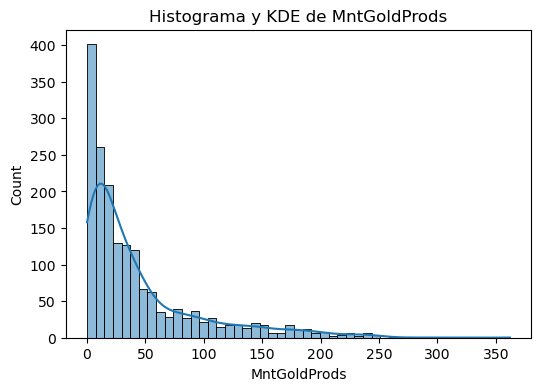

count    1790.00
mean       43.61
std        52.21
min         0.00
25%         9.00
50%        24.00
75%        54.00
max       362.00
Name: MntGoldProds, dtype: float64

La moda es 1.00, el coeficiente de variación es 119.72% y el IQR es 45.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.94, valores extendidos a la derecha

Curtosis: 3.85. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=141.79

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 54 y suponen en proporción 3.02%

La variable MntGoldProds puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.85, asimetria=1.94

Para NumDealsPurchases
*************************


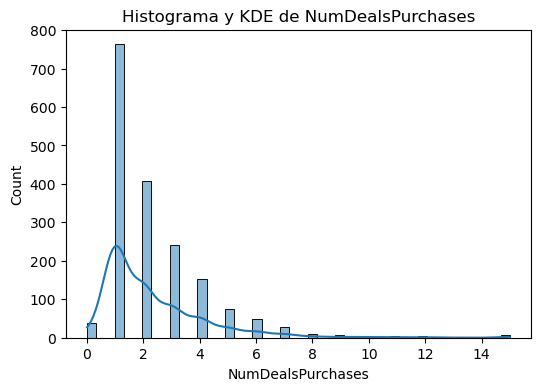

count    1790.00
mean        2.33
std         1.94
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        15.00
Name: NumDealsPurchases, dtype: float64

La moda es 1.00, el coeficiente de variación es 83.27% y el IQR es 2.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.50, valores extendidos a la derecha

Curtosis: 9.64. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=133.51

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 21 y suponen en proporción 1.17%

La variable NumDealsPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.64, asimetria=2.5

Para NumWebPurchases
*************************


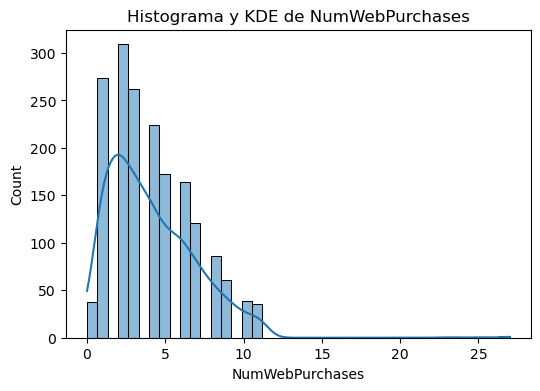

count    1790.00
mean        4.13
std         2.84
min         0.00
25%         2.00
50%         4.00
75%         6.00
max        27.00
Name: NumWebPurchases, dtype: float64

La moda es 2.00, el coeficiente de variación es 68.69% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.50, valores extendidos a la derecha

Curtosis: 6.50. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=38.93

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.22%

La variable NumWebPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.50, asimetria=1.5

Para NumCatalogPurchases
*************************


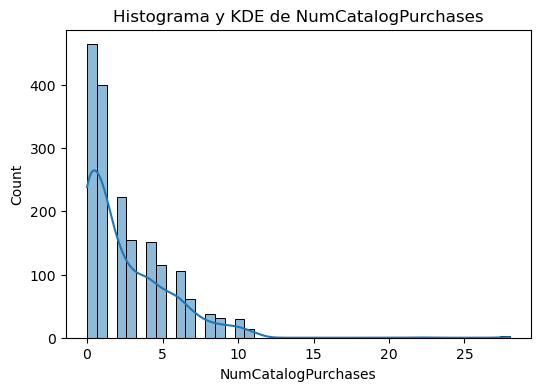

count    1790.00
mean        2.60
std         2.82
min         0.00
25%         0.00
50%         2.00
75%         4.00
max        28.00
Name: NumCatalogPurchases, dtype: float64

La moda es 0.00, el coeficiente de variación es 108.39% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.88, valores extendidos a la derecha

Curtosis: 8.26. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=83.43

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.17%

La variable NumCatalogPurchases puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=8.26, asimetria=1.88

Para NumStorePurchases
*************************


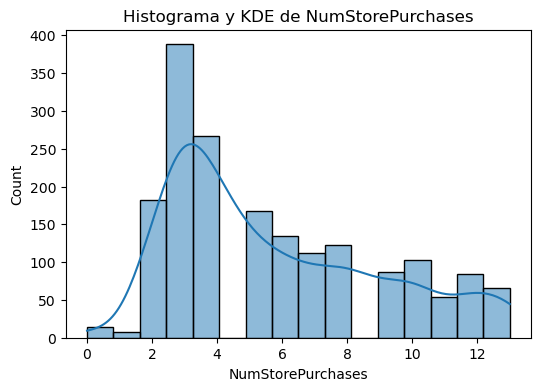

count    1790.00
mean        5.75
std         3.25
min         0.00
25%         3.00
50%         5.00
75%         8.00
max        13.00
Name: NumStorePurchases, dtype: float64

La moda es 3.00, el coeficiente de variación es 56.45% y el IQR es 5.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.71, valores extendidos a la derecha

Curtosis: -0.59. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=62.43

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para NumWebVisitsMonth
*************************


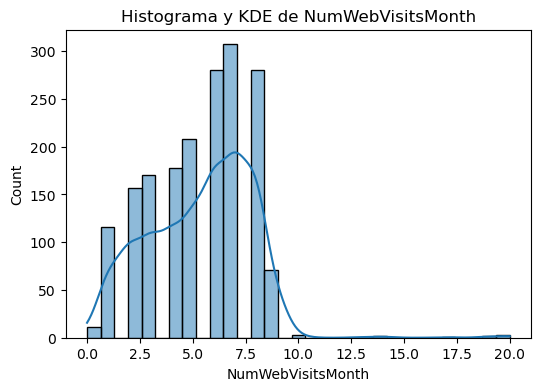

count    1790.00
mean        5.36
std         2.46
min         0.00
25%         3.00
50%         6.00
75%         7.00
max        20.00
Name: NumWebVisitsMonth, dtype: float64

La moda es 7.00, el coeficiente de variación es 45.99% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 2.27. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=29.90

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.17%

Para Response
*************************


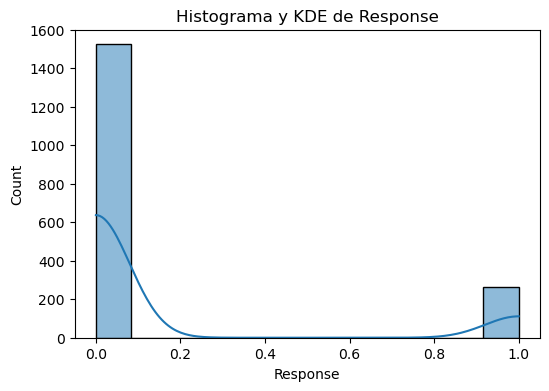

count    1790.00
mean        0.15
std         0.36
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: Response, dtype: float64

La moda es 0.00, el coeficiente de variación es 239.43% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.98, valores extendidos a la derecha

Curtosis: 1.90. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=532.64

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 266 y suponen en proporción 14.86%

Para age
*************************


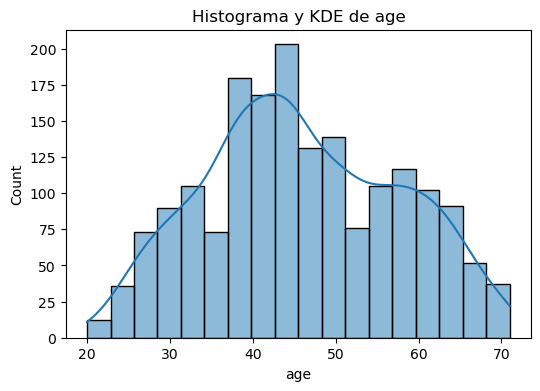

count    1790.00
mean       45.93
std        11.69
min        20.00
25%        37.00
50%        45.00
75%        55.00
max        71.00
Name: age, dtype: float64

La moda es 39.00, el coeficiente de variación es 25.45% y el IQR es 18.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.78. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=7.40

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para customes_seniority
*************************


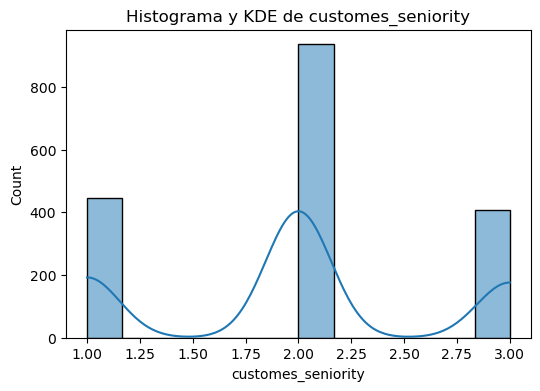

count    1790.00
mean        1.98
std         0.69
min         1.00
25%         2.00
50%         2.00
75%         2.00
max         3.00
Name: customes_seniority, dtype: float64

La moda es 2.00, el coeficiente de variación es 34.90% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.90. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=153.94

Outliers:
Los outliers inferiores son 446 y suponen en proporción 24.92%

Los outliers superiores son 408 y suponen en proporción 22.79%

Para Household_members
*************************


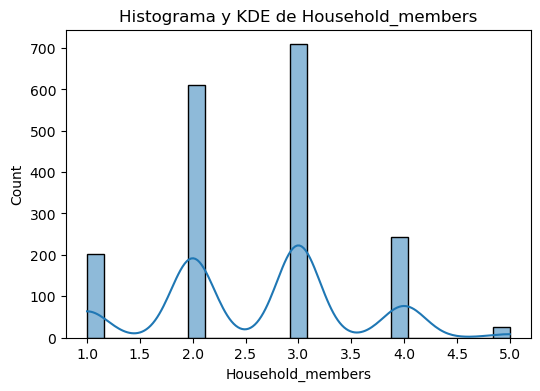

count    1790.00
mean        2.60
std         0.91
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         5.00
Name: Household_members, dtype: float64

La moda es 3.00, el coeficiente de variación es 34.96% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.36. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0026

Prueba Anderson-Darling: estadístico=88.73

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Total_amount
*************************


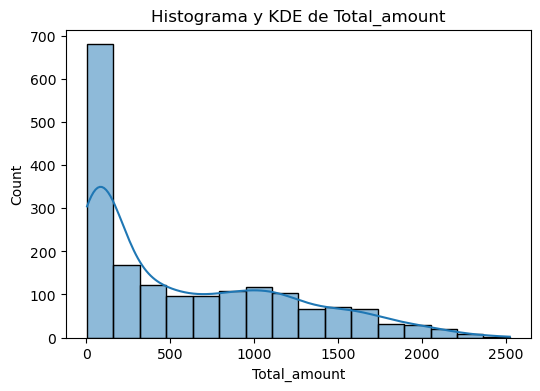

count    1790.00
mean      603.70
std       598.67
min         5.00
25%        69.00
50%       396.00
75%      1044.75
max      2524.00
Name: Total_amount, dtype: float64

La moda es 46.00, el coeficiente de variación es 99.17% y el IQR es 975.75

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 0.85, valores extendidos a la derecha

Curtosis: -0.39. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=85.93

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Total_purchase
*************************


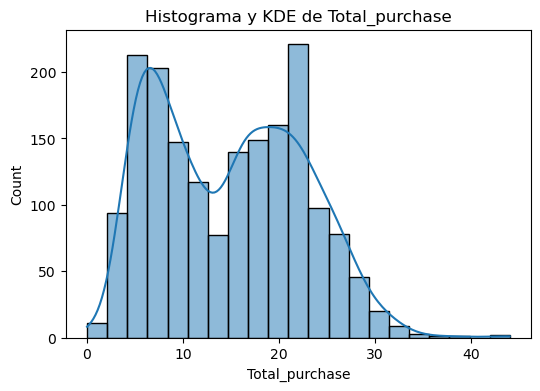

count    1790.00
mean       14.82
std         7.64
min         0.00
25%         8.00
50%        15.00
75%        21.00
max        44.00
Name: Total_purchase, dtype: float64

La moda es 7.00, el coeficiente de variación es 51.57% y el IQR es 13.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.85. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=26.57

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Median_amount_purchase
*************************


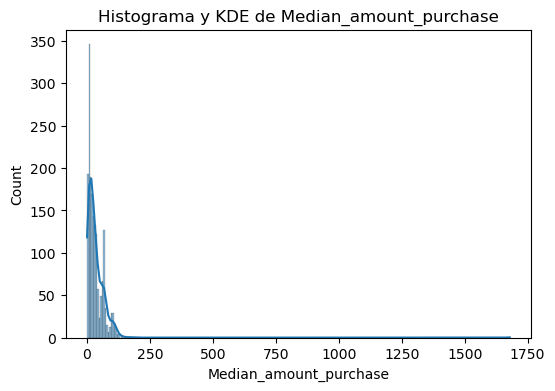

count    1790.00
mean       33.55
std        48.34
min         0.00
25%         9.78
50%        23.39
75%        45.55
max      1679.00
Name: Median_amount_purchase, dtype: float64

La moda es 5.00, el coeficiente de variación es 144.08% y el IQR es 35.77

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 22.31, valores extendidos a la derecha

Curtosis: 748.21. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=150.49

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.22%

La variable Median_amount_purchase puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=748.21, asimetria=22.31

Para Total_cmp
*************************


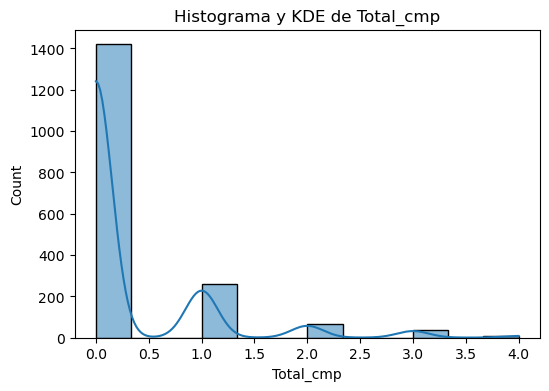

count    1790.00
mean        0.30
std         0.68
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: Total_cmp, dtype: float64

La moda es 0.00, el coeficiente de variación es 228.14% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.73, valores extendidos a la derecha

Curtosis: 8.02. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=391.44

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 370 y suponen en proporción 20.67%

La variable Total_cmp puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=8.02, asimetria=2.73

Para Total_%_cmp
*************************


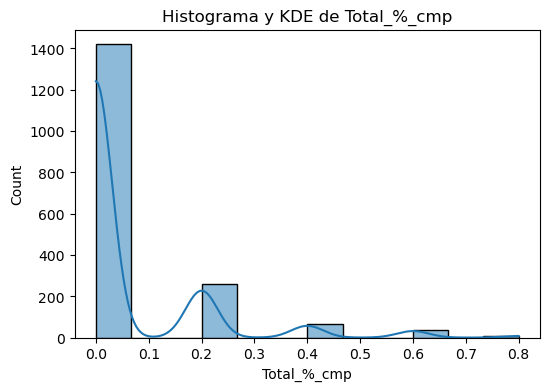

count    1790.00
mean        0.06
std         0.14
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.80
Name: Total_%_cmp, dtype: float64

La moda es 0.00, el coeficiente de variación es 228.14% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.73, valores extendidos a la derecha

Curtosis: 8.02. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=391.44

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 370 y suponen en proporción 20.67%

La variable Total_%_cmp puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=8.02, asimetria=2.73

features_log: ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp']

features_no_log: ['Year_Birth', 'Inc

,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Year_Birth,0.0,0.0003,6.78,-0.21,-0.19,0.06,0.00,False
Income,0.0,0.0000,8.33,0.04,-0.83,0.00,0.00,False
Kidhome,0.0,0.0000,282.67,0.62,-0.79,0.00,0.00,False
Teenhome,0.0,0.0000,266.23,0.44,-0.93,0.00,0.00,False
Recency,0.0,0.0000,20.25,0.01,-1.20,0.00,0.00,False
MntWines,0.0,0.0000,98.28,1.19,0.68,0.00,0.00,False
MntFruits,0.0,0.0000,201.79,2.11,4.09,0.00,4.75,True
MntMeatProducts,0.0,0.0000,163.05,2.07,5.44,0.00,1.28,True
MntFishProducts,0.0,0.0000,195.44,1.93,3.09,0.00,3.41,True
MntSweetProducts,0.0,0.0000,207.79,2.16,4.50,0.00,5.03,True


In [143]:
analisis_univariable_numericas(train_set,features_num)

___

## Análisis bivariable con la target

In [144]:
train_set['Response_cat'] = train_set['Response'].astype('category')
print(train_set.Response_cat.dtype)
target_cat = 'Response_cat'

category


### Categóricas con target

Análisis de Education vs Response_cat
****************************************


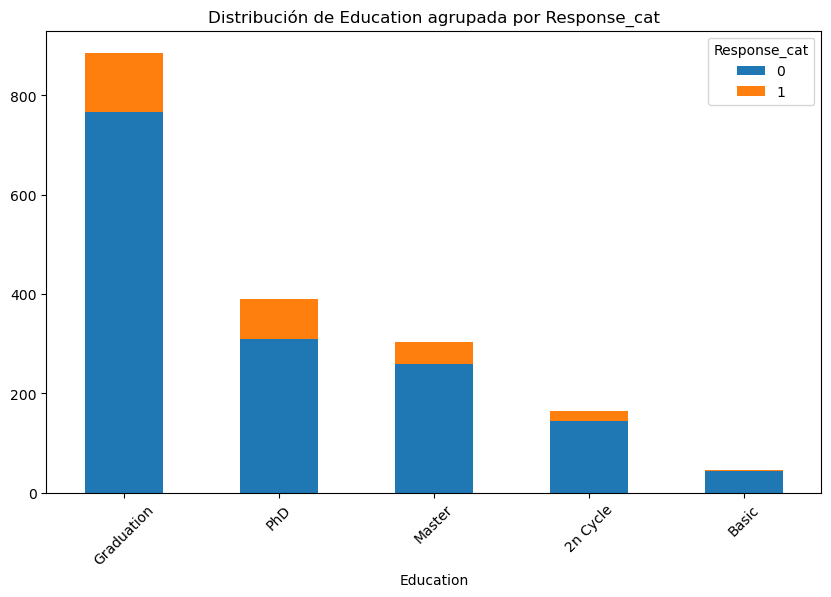

Tabla de contingencia de Education vs Response_cat:
Response_cat    0    1
Education             
Graduation    767  119
PhD           310   79
Master        259   45
2n Cycle      144   21
Basic          44    2

Tabla de porcentajes de Education respecto a Response_cat:
Response_cat          0          1
Education                         
Graduation    50.328084  44.736842
PhD           20.341207  29.699248
Master        16.994751  16.917293
2n Cycle       9.448819   7.894737
Basic          2.887139   0.751880

Tabla de frecuencias para Education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
Education                                               
Graduation                  886                49.497207
PhD                         389                21.731844
Master                      304                16.983240
2n Cycle                    165                 9.217877
Basic                        46                 2.569832

Análisis de Marital_Status vs Response_cat
*

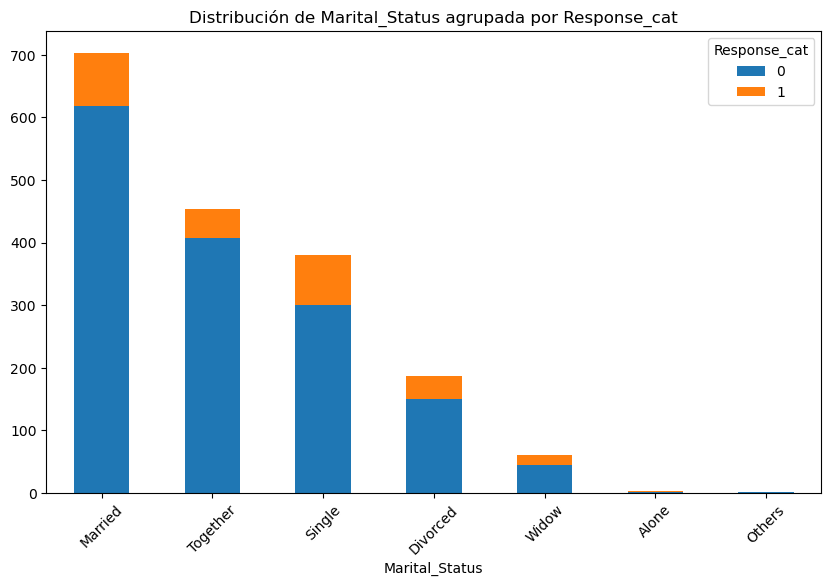

Tabla de contingencia de Marital_Status vs Response_cat:
Response_cat      0   1
Marital_Status         
Married         619  84
Together        407  47
Single          300  80
Divorced        150  37
Widow            45  16
Alone             2   1
Others            1   1

Tabla de porcentajes de Marital_Status respecto a Response_cat:
Response_cat            0          1
Marital_Status                      
Married         40.616798  31.578947
Together        26.706037  17.669173
Single          19.685039  30.075188
Divorced         9.842520  13.909774
Widow            2.952756   6.015038
Alone            0.131234   0.375940
Others           0.065617   0.375940

Tabla de frecuencias para Marital_Status:
                Frecuencia Absoluta  Frecuencia Relativa (%)
Marital_Status                                              
Married                         703                39.273743
Together                        454                25.363128
Single                          380       

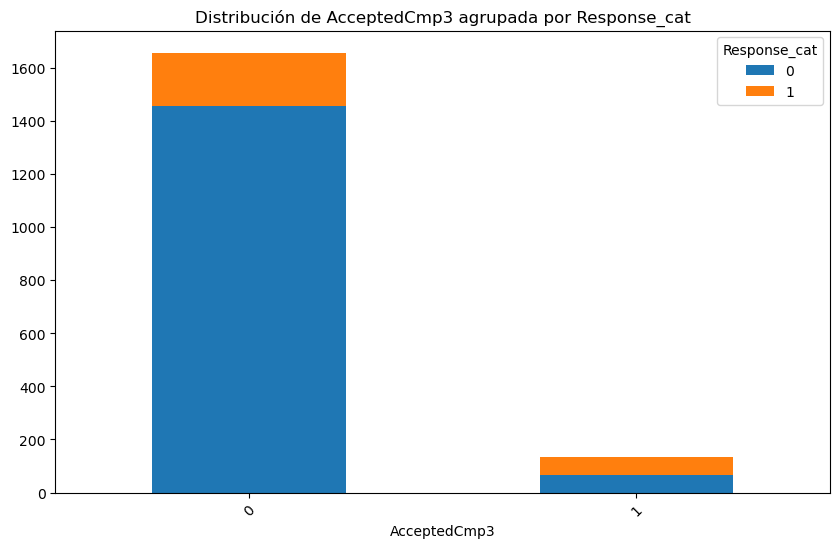

Tabla de contingencia de AcceptedCmp3 vs Response_cat:
Response_cat     0    1
AcceptedCmp3           
0             1457  200
1               67   66

Tabla de porcentajes de AcceptedCmp3 respecto a Response_cat:
Response_cat          0         1
AcceptedCmp3                     
0             95.603675  75.18797
1              4.396325  24.81203

Tabla de frecuencias para AcceptedCmp3:
              Frecuencia Absoluta  Frecuencia Relativa (%)
AcceptedCmp3                                              
0                            1657                92.569832
1                             133                 7.430168

Análisis de AcceptedCmp4 vs Response_cat
****************************************


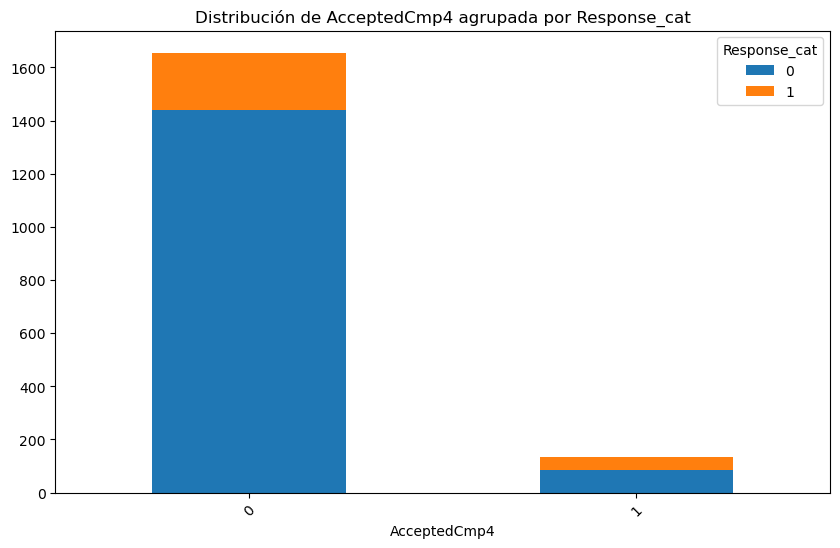

Tabla de contingencia de AcceptedCmp4 vs Response_cat:
Response_cat     0    1
AcceptedCmp4           
0             1438  218
1               86   48

Tabla de porcentajes de AcceptedCmp4 respecto a Response_cat:
Response_cat          0          1
AcceptedCmp4                      
0             94.356955  81.954887
1              5.643045  18.045113

Tabla de frecuencias para AcceptedCmp4:
              Frecuencia Absoluta  Frecuencia Relativa (%)
AcceptedCmp4                                              
0                            1656                92.513966
1                             134                 7.486034

Análisis de AcceptedCmp5 vs Response_cat
****************************************


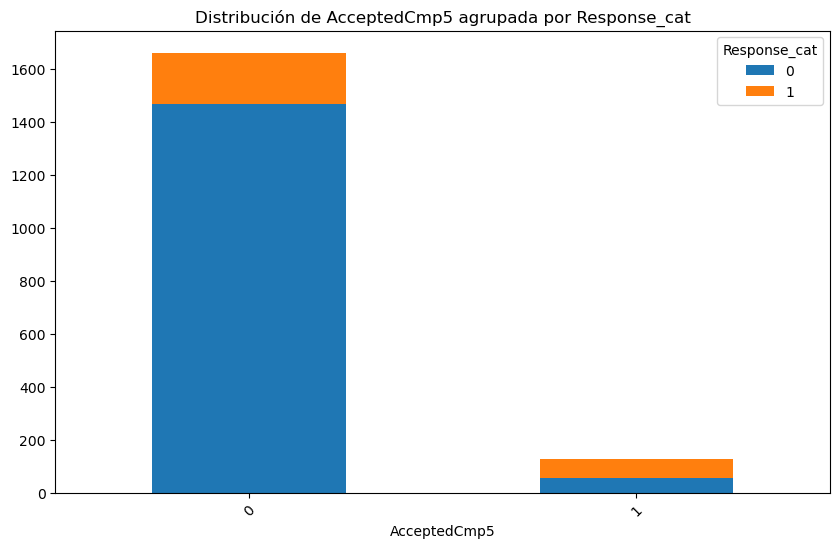

Tabla de contingencia de AcceptedCmp5 vs Response_cat:
Response_cat     0    1
AcceptedCmp5           
0             1468  194
1               56   72

Tabla de porcentajes de AcceptedCmp5 respecto a Response_cat:
Response_cat          0          1
AcceptedCmp5                      
0             96.325459  72.932331
1              3.674541  27.067669

Tabla de frecuencias para AcceptedCmp5:
              Frecuencia Absoluta  Frecuencia Relativa (%)
AcceptedCmp5                                              
0                            1662                92.849162
1                             128                 7.150838

Análisis de AcceptedCmp1 vs Response_cat
****************************************


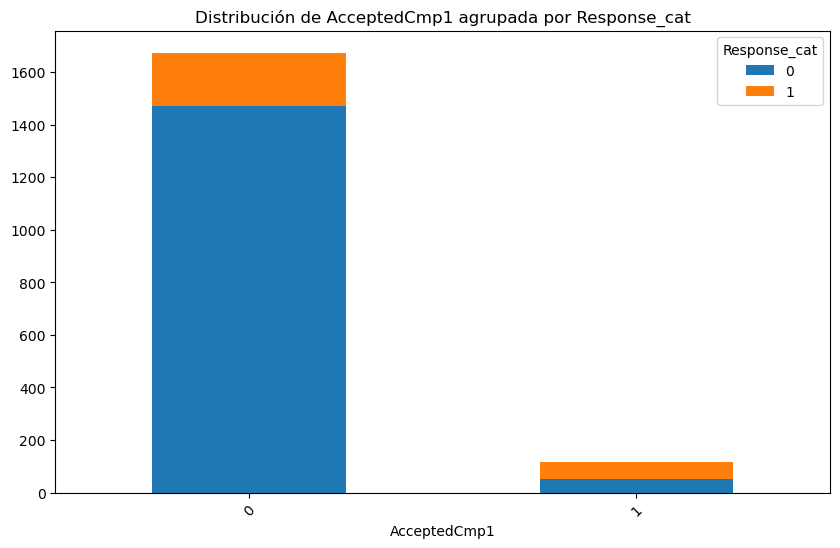

Tabla de contingencia de AcceptedCmp1 vs Response_cat:
Response_cat     0    1
AcceptedCmp1           
0             1472  202
1               52   64

Tabla de porcentajes de AcceptedCmp1 respecto a Response_cat:
Response_cat          0         1
AcceptedCmp1                     
0             96.587927  75.93985
1              3.412073  24.06015

Tabla de frecuencias para AcceptedCmp1:
              Frecuencia Absoluta  Frecuencia Relativa (%)
AcceptedCmp1                                              
0                            1674                93.519553
1                             116                 6.480447

Análisis de AcceptedCmp2 vs Response_cat
****************************************


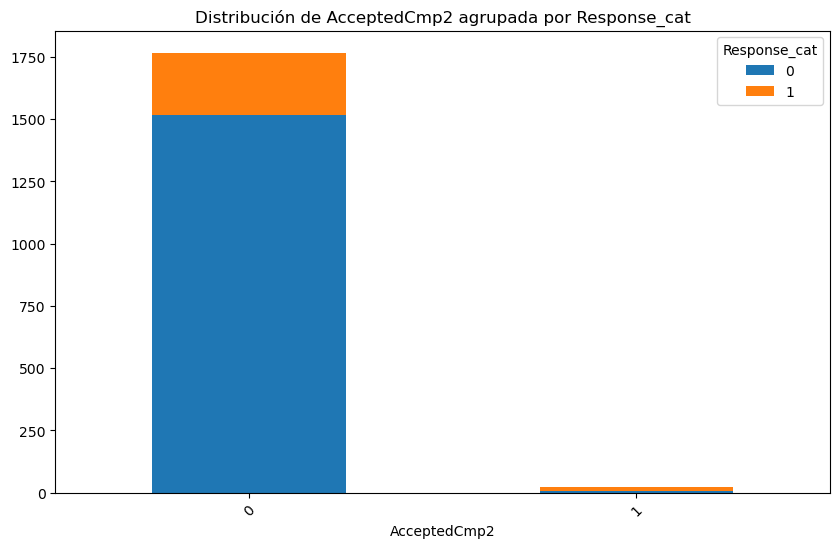

Tabla de contingencia de AcceptedCmp2 vs Response_cat:
Response_cat     0    1
AcceptedCmp2           
0             1517  250
1                7   16

Tabla de porcentajes de AcceptedCmp2 respecto a Response_cat:
Response_cat          0          1
AcceptedCmp2                      
0             99.540682  93.984962
1              0.459318   6.015038

Tabla de frecuencias para AcceptedCmp2:
              Frecuencia Absoluta  Frecuencia Relativa (%)
AcceptedCmp2                                              
0                            1767                98.715084
1                              23                 1.284916

Análisis de Complain vs Response_cat
****************************************


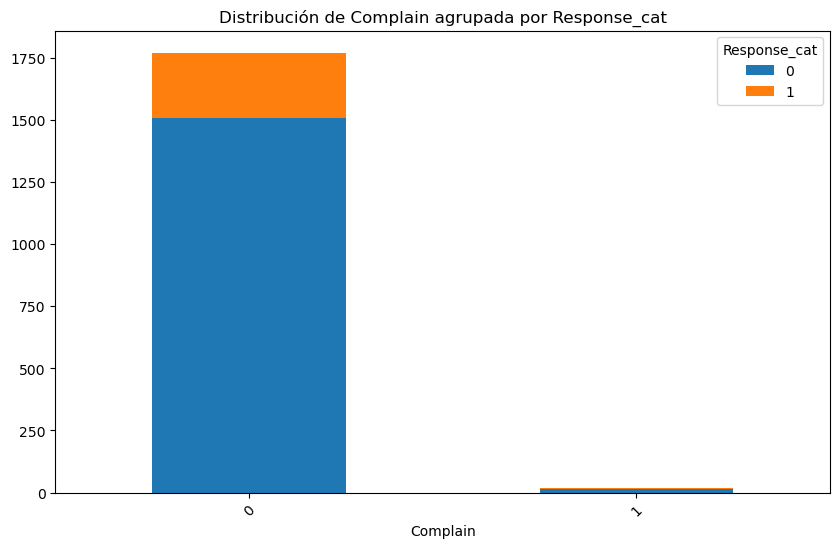

Tabla de contingencia de Complain vs Response_cat:
Response_cat     0    1
Complain               
0             1508  263
1               16    3

Tabla de porcentajes de Complain respecto a Response_cat:
Response_cat          0         1
Complain                         
0             98.950131  98.87218
1              1.049869   1.12782

Tabla de frecuencias para Complain:
          Frecuencia Absoluta  Frecuencia Relativa (%)
Complain                                              
0                        1771                98.938547
1                          19                 1.061453



In [145]:
analisis_bivariable_categoricas_categorica(train_set,target_cat,features_cat)

### Numéricas con target

Análisis de Year_Birth vs Response
****************************************


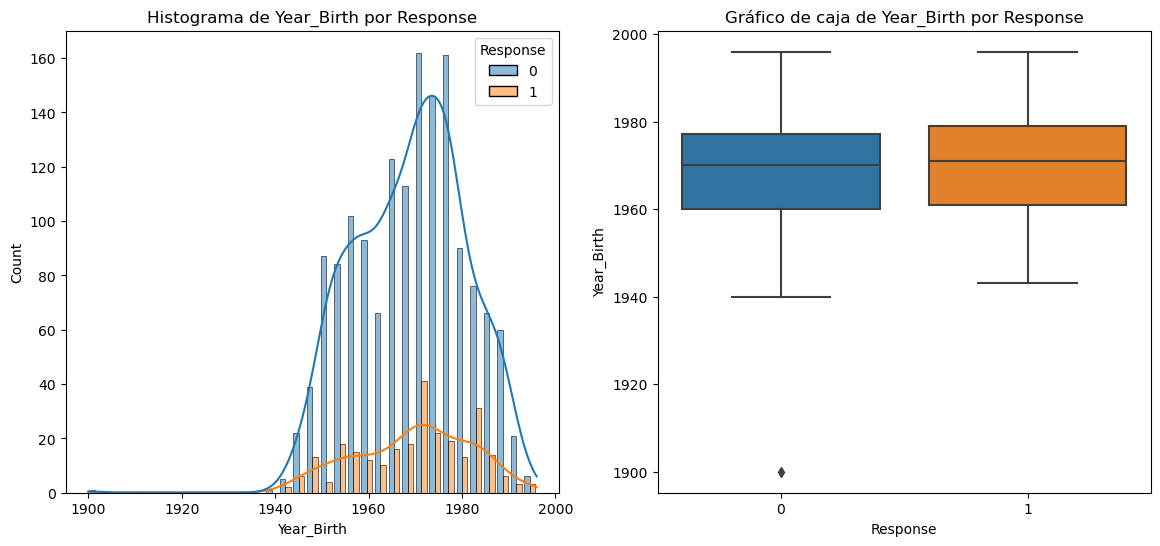

Estadísticos de resumen para Year_Birth por Response:
           count     mean    std     min     25%     50%      75%     max
Response                                                                 
0         1524.0  1968.92  11.75  1900.0  1960.0  1970.0  1977.25  1996.0
1          266.0  1969.70  12.16  1943.0  1961.0  1971.0  1979.00  1996.0

Prueba t-student para Year_Birth:
Estadístico t: -1.00
p-valor: 0.318
La variable Year_Birth no está significativamente asociada con Response (p >= 0.05).

Análisis de Income vs Response
****************************************


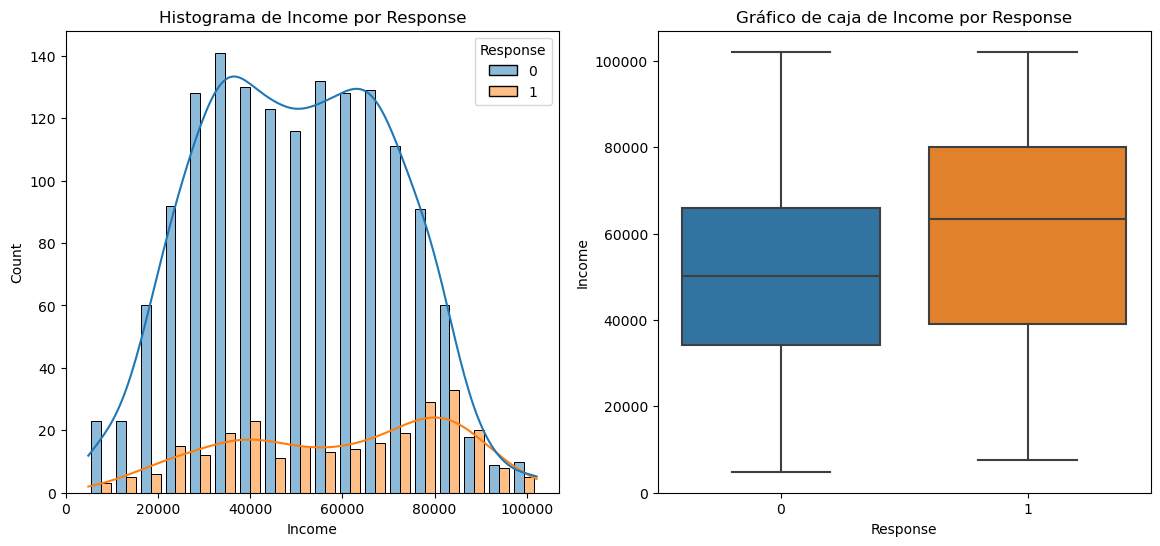

Estadísticos de resumen para Income por Response:
           count      mean       std     min      25%      50%       75%  \
Response                                                                   
0         1524.0  50236.09  20212.31  4861.0  34216.5  50138.5  65973.75   
1          266.0  59518.09  23708.94  7500.0  38994.0  63453.0  80139.25   

               max  
Response            
0         102160.0  
1         102160.0  

Prueba t-student para Income:
Estadístico t: -6.73
p-valor: 0.000
La variable Income está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Response
****************************************


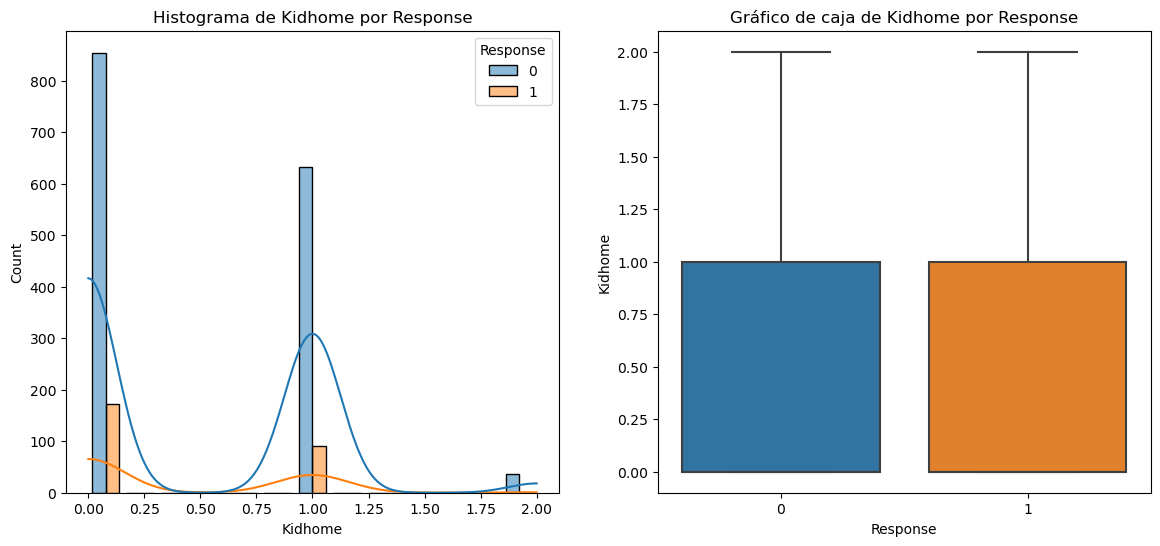

Estadísticos de resumen para Kidhome por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  0.46  0.55  0.0  0.0  0.0  1.0  2.0
1          266.0  0.36  0.50  0.0  0.0  0.0  1.0  2.0

Prueba t-student para Kidhome:
Estadístico t: 2.98
p-valor: 0.003
La variable Kidhome está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Response
****************************************


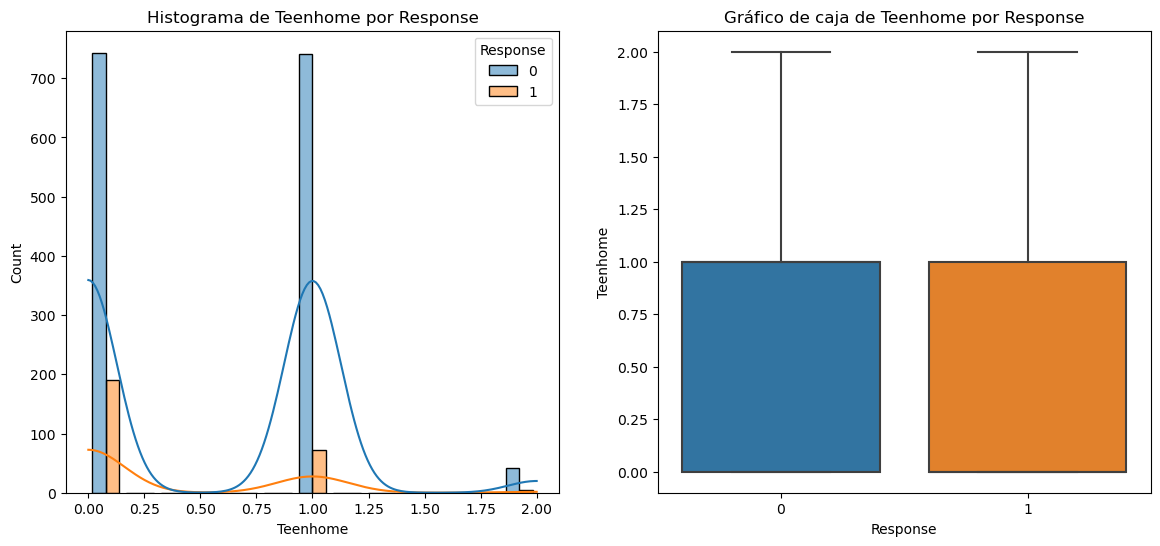

Estadísticos de resumen para Teenhome por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  0.54  0.55  0.0  0.0  1.0  1.0  2.0
1          266.0  0.30  0.49  0.0  0.0  0.0  1.0  2.0

Prueba t-student para Teenhome:
Estadístico t: 6.63
p-valor: 0.000
La variable Teenhome está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Response
****************************************


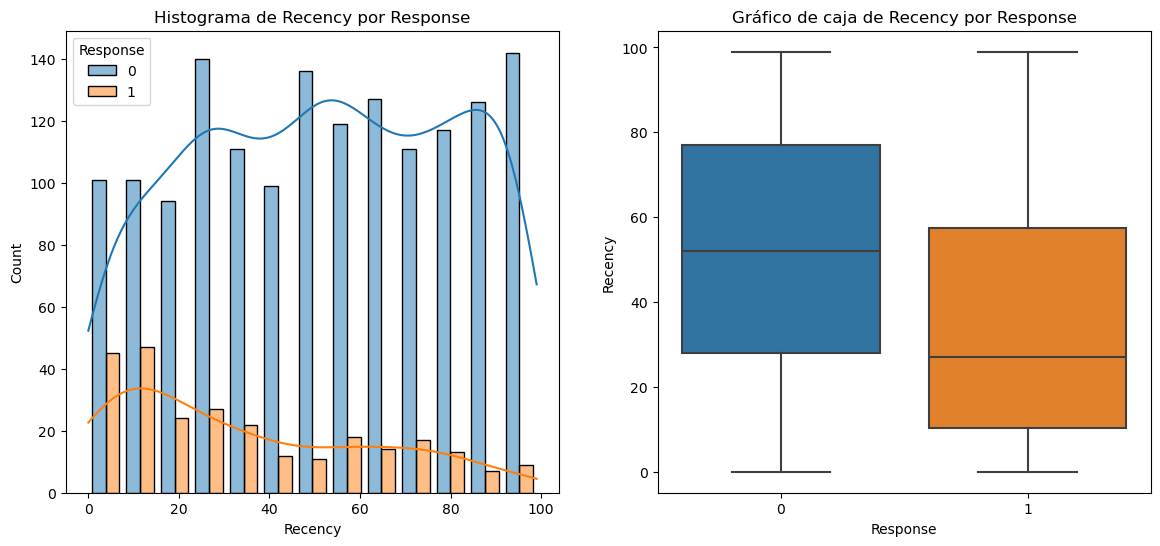

Estadísticos de resumen para Recency por Response:
           count   mean    std  min    25%   50%   75%   max
Response                                                    
0         1524.0  51.51  28.44  0.0  28.00  52.0  77.0  99.0
1          266.0  34.94  28.12  0.0  10.25  27.0  57.5  99.0

Prueba t-student para Recency:
Estadístico t: 8.78
p-valor: 0.000
La variable Recency está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntWines vs Response
****************************************


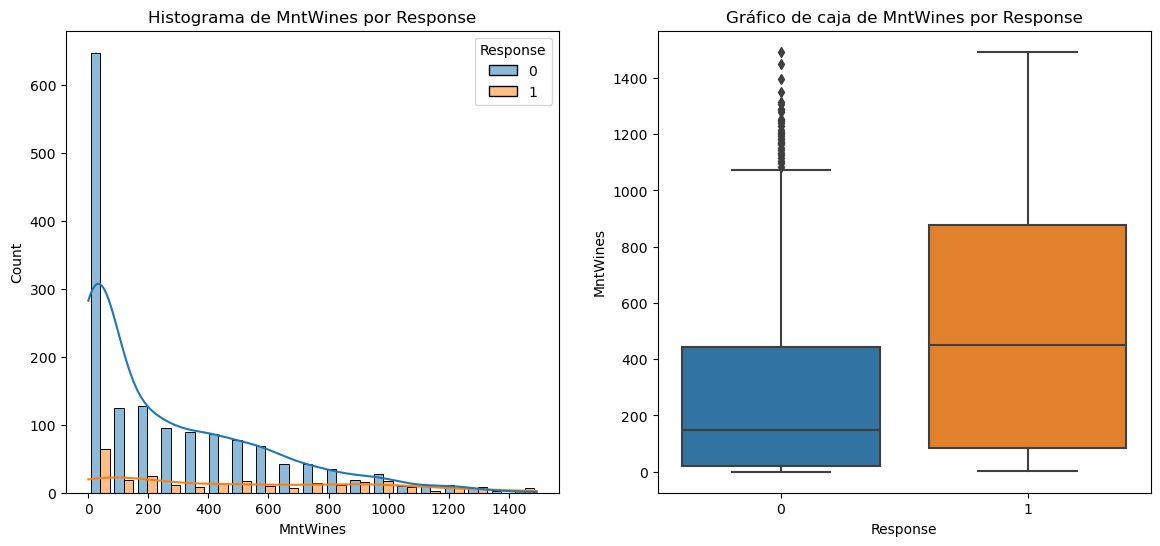

Estadísticos de resumen para MntWines por Response:
           count    mean     std  min   25%    50%    75%     max
Response                                                         
0         1524.0  269.14  305.23  0.0  22.0  148.5  445.0  1493.0
1          266.0  497.62  430.63  1.0  85.0  449.0  875.5  1492.0

Prueba t-student para MntWines:
Estadístico t: -10.52
p-valor: 0.000
La variable MntWines está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Response
****************************************


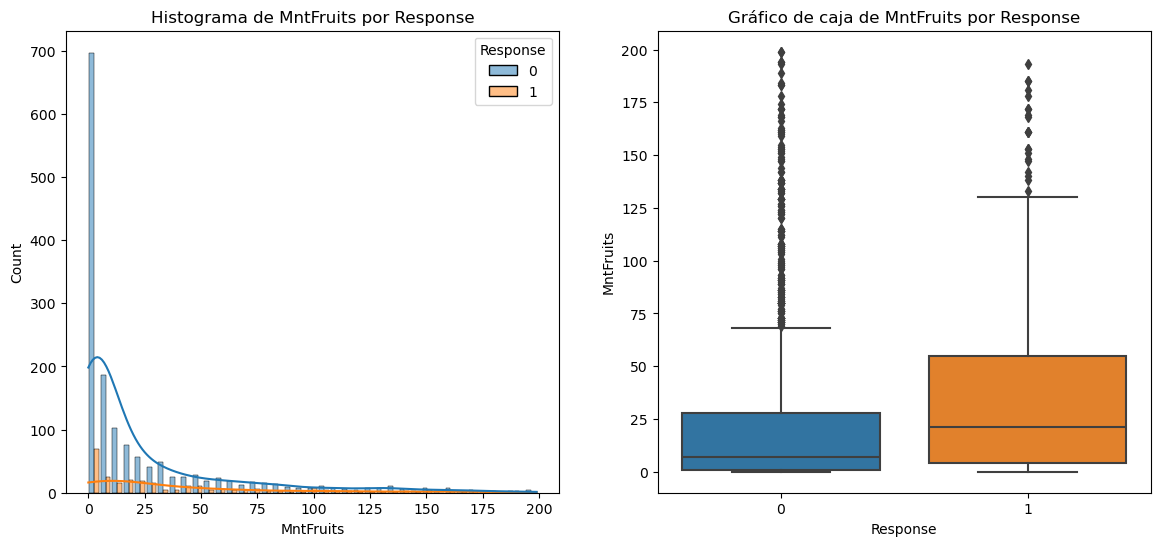

Estadísticos de resumen para MntFruits por Response:
           count   mean    std  min  25%   50%    75%    max
Response                                                    
0         1524.0  23.83  37.70  0.0  1.0   7.0  28.00  199.0
1          266.0  39.77  47.44  0.0  4.0  21.0  54.75  193.0

Prueba t-student para MntFruits:
Estadístico t: -6.10
p-valor: 0.000
La variable MntFruits está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Response
****************************************


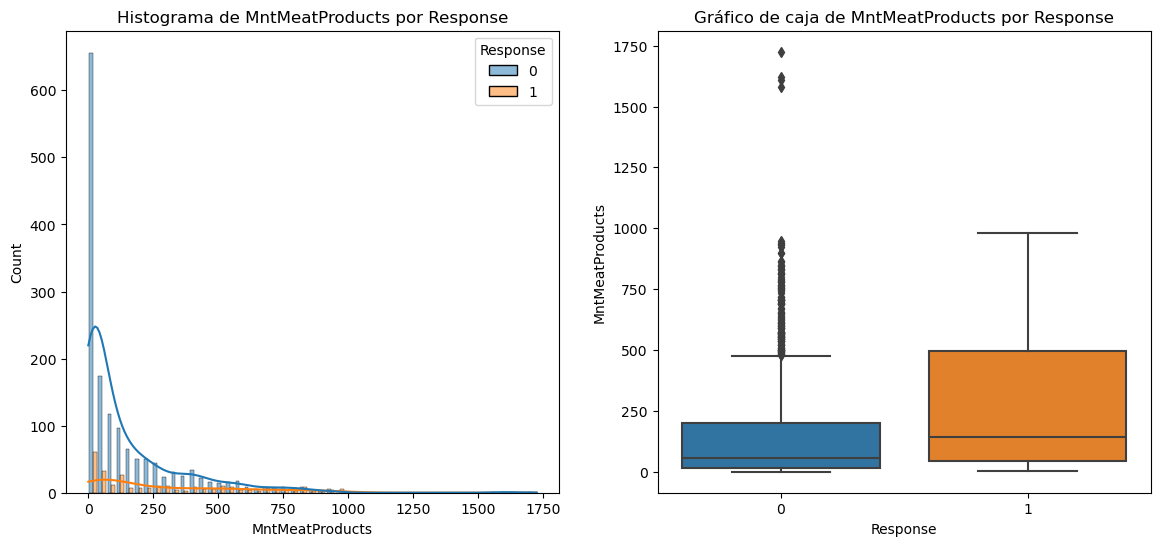

Estadísticos de resumen para MntMeatProducts por Response:
           count    mean     std  min   25%    50%     75%     max
Response                                                          
0         1524.0  145.98  205.35  0.0  14.0   56.0  199.00  1725.0
1          266.0  282.07  283.25  1.0  45.0  144.5  496.75   981.0

Prueba t-student para MntMeatProducts:
Estadístico t: -9.37
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Response
****************************************


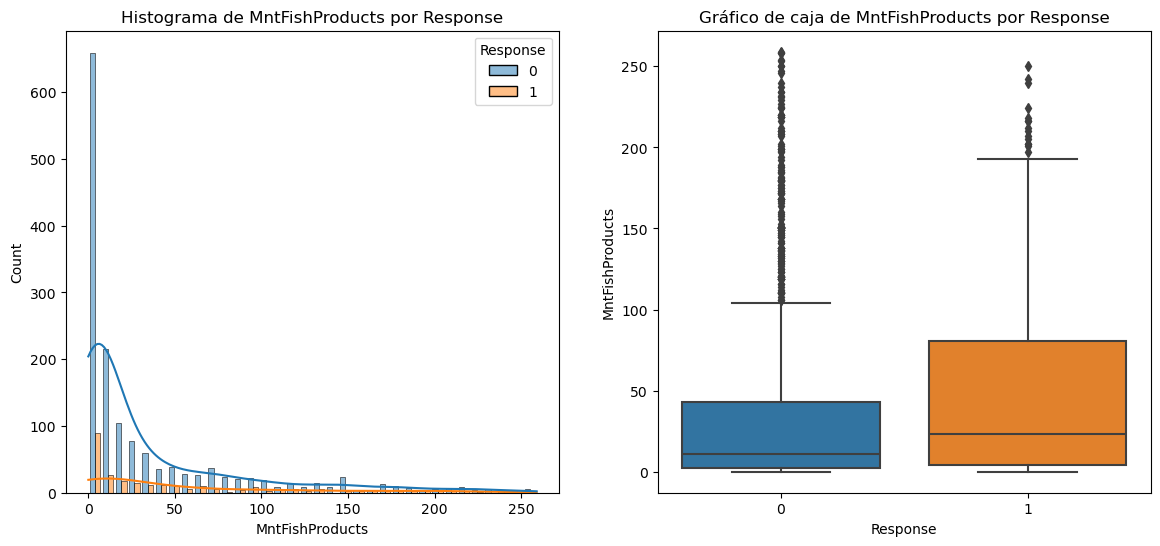

Estadísticos de resumen para MntFishProducts por Response:
           count   mean    std  min  25%   50%   75%    max
Response                                                   
0         1524.0  35.15  53.14  0.0  2.0  11.0  43.0  259.0
1          266.0  52.32  64.11  0.0  4.0  23.0  80.5  250.0

Prueba t-student para MntFishProducts:
Estadístico t: -4.71
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Response
****************************************


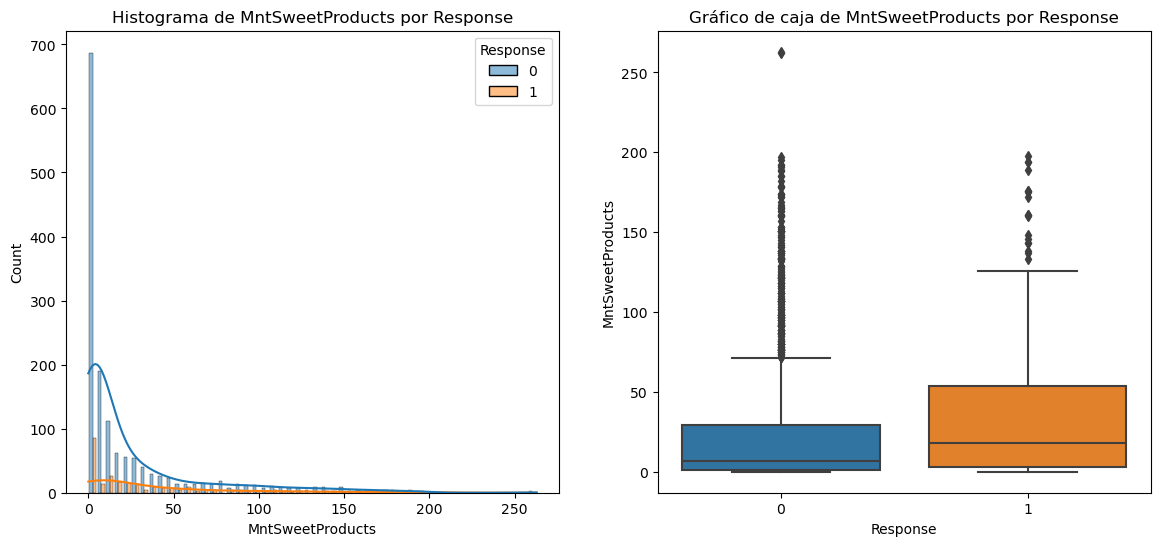

Estadísticos de resumen para MntSweetProducts por Response:
           count   mean    std  min  25%   50%    75%    max
Response                                                    
0         1524.0  25.13  40.29  0.0  1.0   7.0  29.25  263.0
1          266.0  36.98  46.52  0.0  3.0  18.0  53.75  198.0

Prueba t-student para MntSweetProducts:
Estadístico t: -4.32
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Response
****************************************


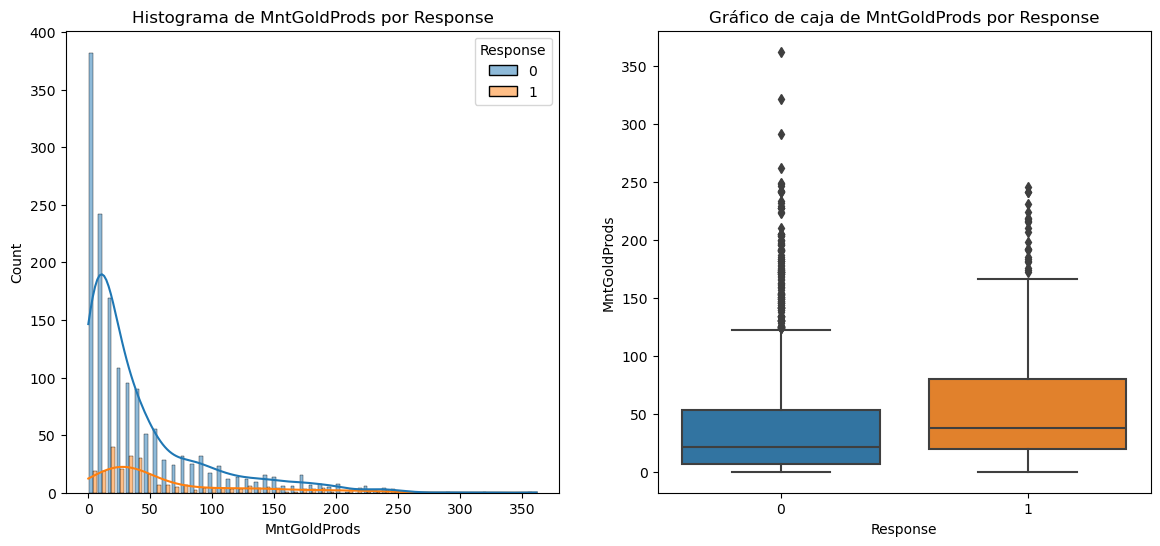

Estadísticos de resumen para MntGoldProds por Response:
           count   mean    std  min   25%   50%    75%    max
Response                                                     
0         1524.0  40.83  50.61  0.0   7.0  21.0  53.00  362.0
1          266.0  59.56  58.14  0.0  20.0  37.5  79.75  245.0

Prueba t-student para MntGoldProds:
Estadístico t: -5.44
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Response
****************************************


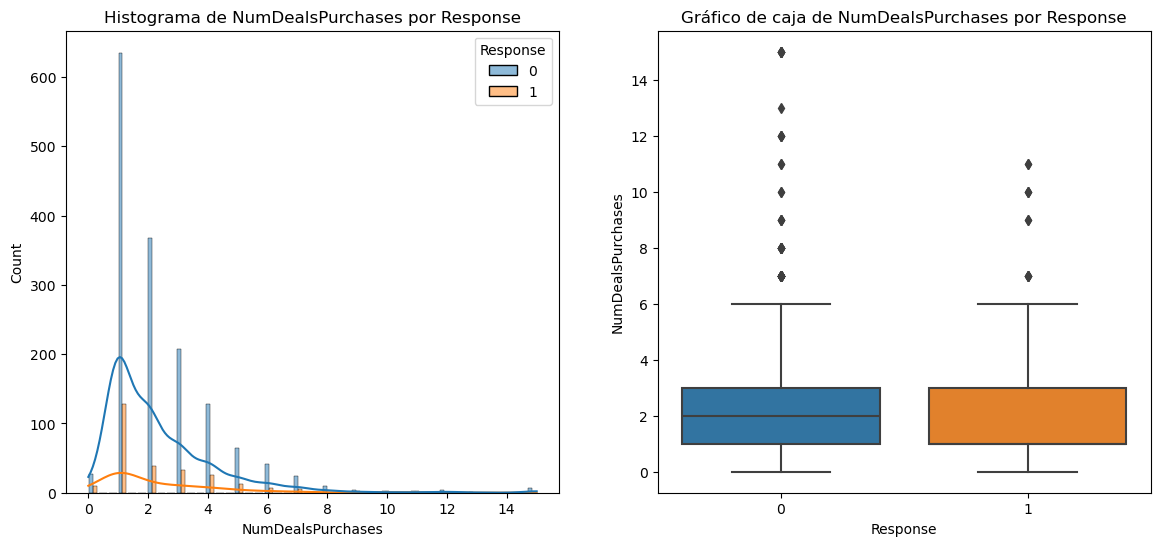

Estadísticos de resumen para NumDealsPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1524.0  2.34  1.93  0.0  1.0  2.0  3.0  15.0
1          266.0  2.30  2.01  0.0  1.0  1.0  3.0  11.0

Prueba t-student para NumDealsPurchases:
Estadístico t: 0.28
p-valor: 0.777
La variable NumDealsPurchases no está significativamente asociada con Response (p >= 0.05).

Análisis de NumWebPurchases vs Response
****************************************


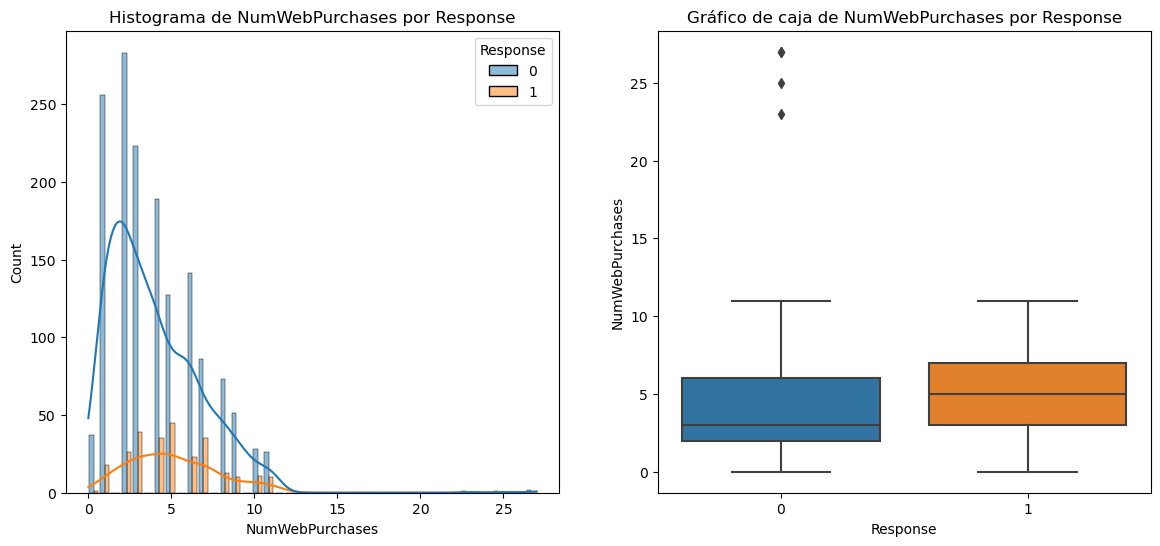

Estadísticos de resumen para NumWebPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1524.0  3.96  2.84  0.0  2.0  3.0  6.0  27.0
1          266.0  5.07  2.61  0.0  3.0  5.0  7.0  11.0

Prueba t-student para NumWebPurchases:
Estadístico t: -5.93
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Response
****************************************


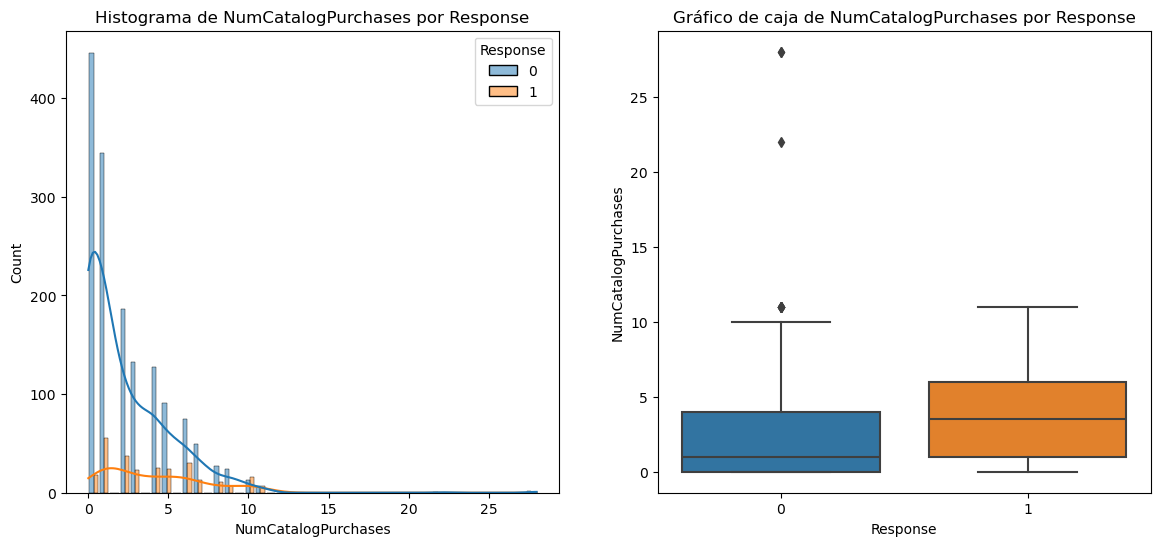

Estadísticos de resumen para NumCatalogPurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1524.0  2.35  2.70  0.0  0.0  1.0  4.0  28.0
1          266.0  4.05  3.06  0.0  1.0  3.5  6.0  11.0

Prueba t-student para NumCatalogPurchases:
Estadístico t: -9.26
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Response
****************************************


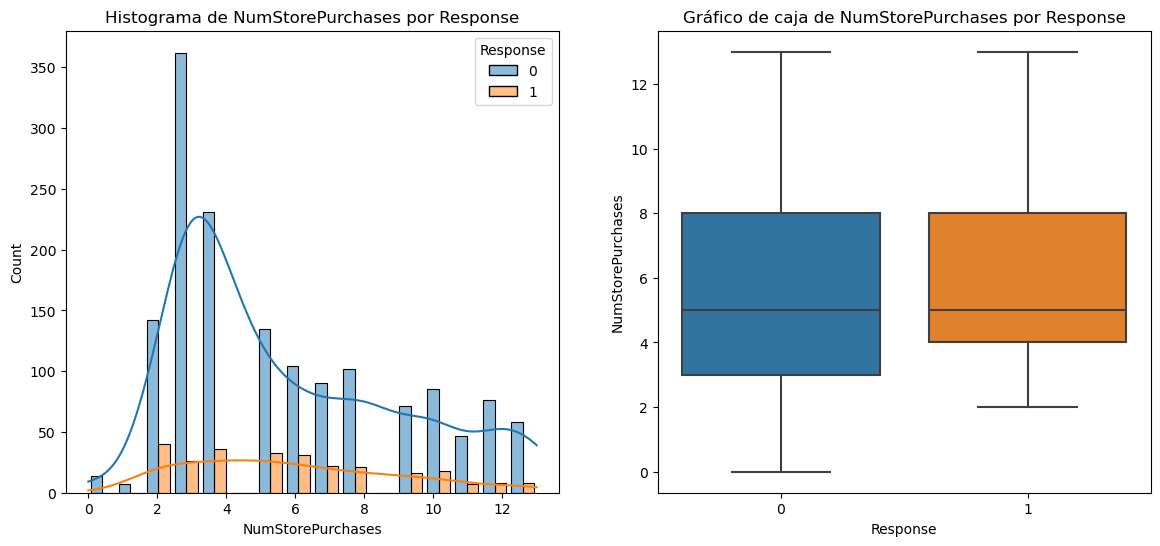

Estadísticos de resumen para NumStorePurchases por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1524.0  5.72  3.28  0.0  3.0  5.0  8.0  13.0
1          266.0  5.92  3.04  2.0  4.0  5.0  8.0  13.0

Prueba t-student para NumStorePurchases:
Estadístico t: -0.95
p-valor: 0.344
La variable NumStorePurchases no está significativamente asociada con Response (p >= 0.05).

Análisis de NumWebVisitsMonth vs Response
****************************************


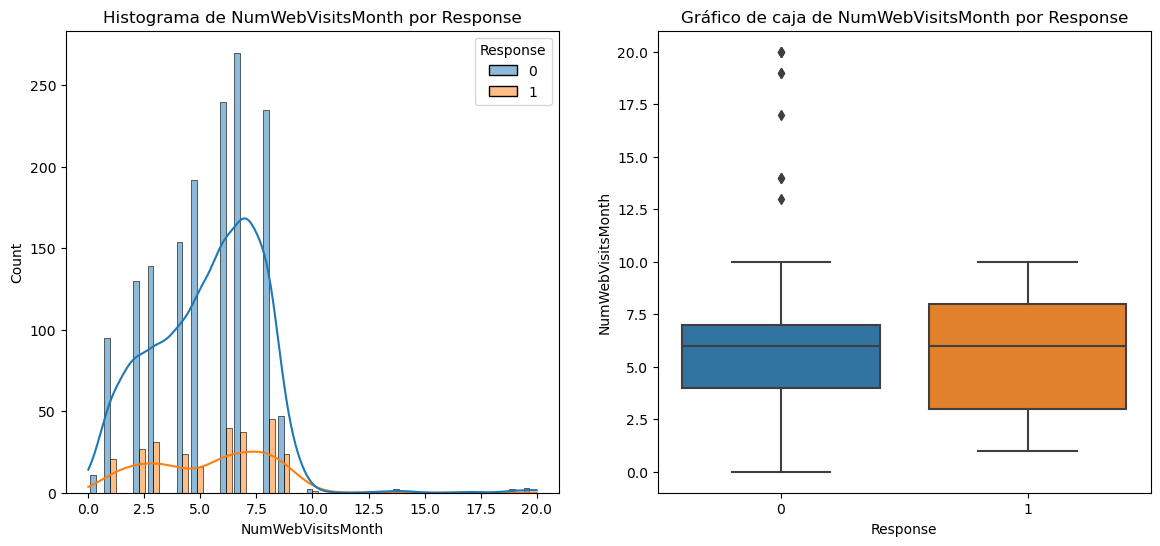

Estadísticos de resumen para NumWebVisitsMonth por Response:
           count  mean   std  min  25%  50%  75%   max
Response                                              
0         1524.0  5.35  2.45  0.0  4.0  6.0  7.0  20.0
1          266.0  5.37  2.53  1.0  3.0  6.0  8.0  10.0

Prueba t-student para NumWebVisitsMonth:
Estadístico t: -0.12
p-valor: 0.904
La variable NumWebVisitsMonth no está significativamente asociada con Response (p >= 0.05).

Análisis de Response vs Response
****************************************


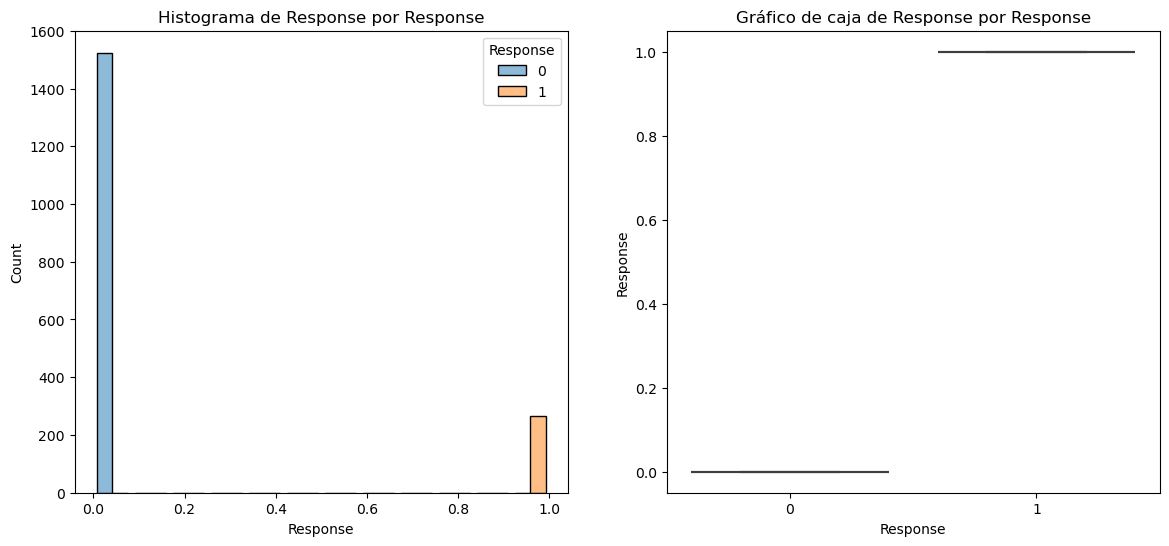

Estadísticos de resumen para Response por Response:
           count  mean  std  min  25%  50%  75%  max
Response                                            
0         1524.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1          266.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

Prueba t-student para Response:
Estadístico t: -inf
p-valor: 0.000
La variable Response está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Response
****************************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


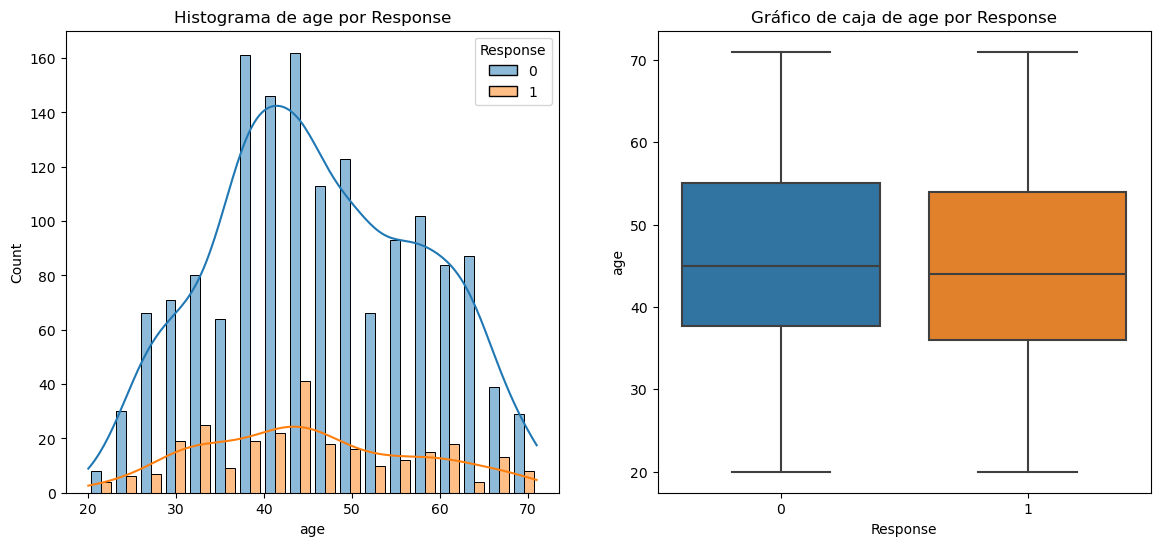

Estadísticos de resumen para age por Response:
           count   mean    std   min    25%   50%   75%   max
Response                                                     
0         1524.0  46.05  11.61  20.0  37.75  45.0  55.0  71.0
1          266.0  45.29  12.13  20.0  36.00  44.0  54.0  71.0

Prueba t-student para age:
Estadístico t: 0.97
p-valor: 0.333
La variable age no está significativamente asociada con Response (p >= 0.05).

Análisis de customes_seniority vs Response
****************************************


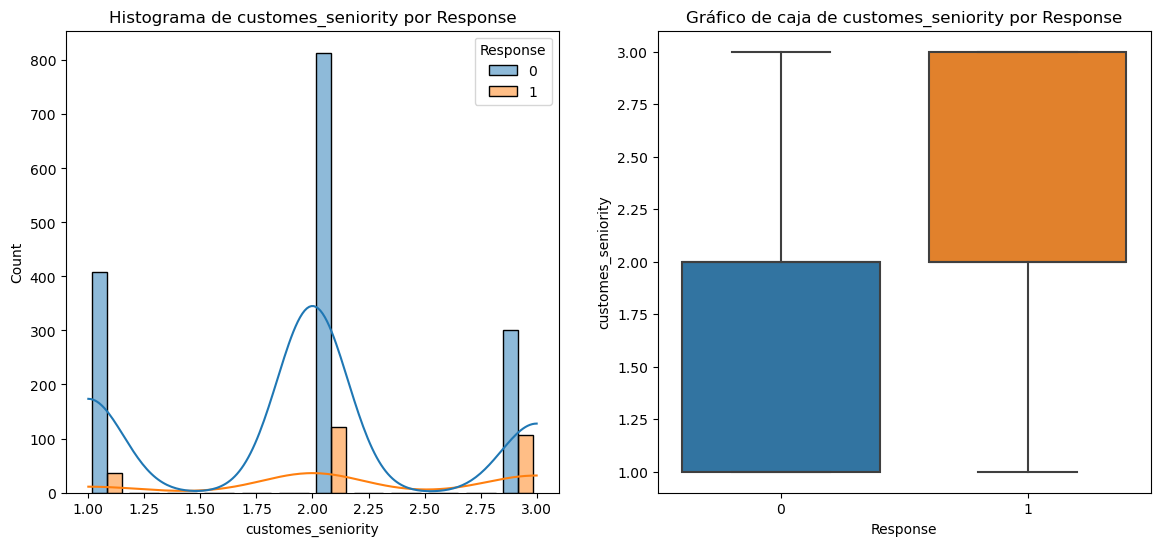

Estadísticos de resumen para customes_seniority por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  1.93  0.68  1.0  1.0  2.0  2.0  3.0
1          266.0  2.26  0.69  1.0  2.0  2.0  3.0  3.0

Prueba t-student para customes_seniority:
Estadístico t: -7.39
p-valor: 0.000
La variable customes_seniority está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Household_members vs Response
****************************************


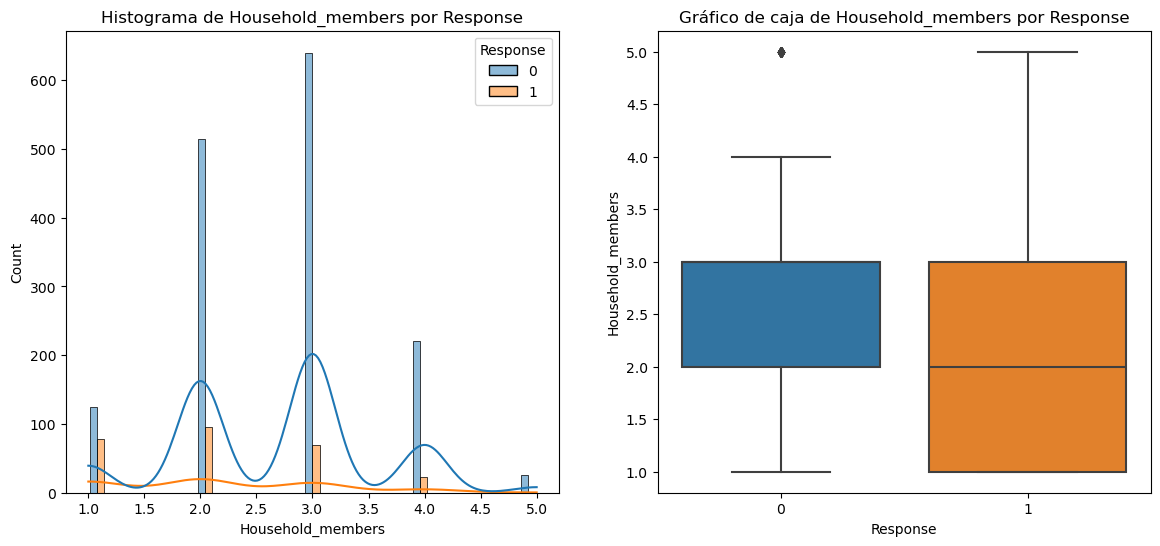

Estadísticos de resumen para Household_members por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  2.68  0.88  1.0  2.0  3.0  3.0  5.0
1          266.0  2.15  0.96  1.0  1.0  2.0  3.0  5.0

Prueba t-student para Household_members:
Estadístico t: 8.91
p-valor: 0.000
La variable Household_members está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Response
****************************************


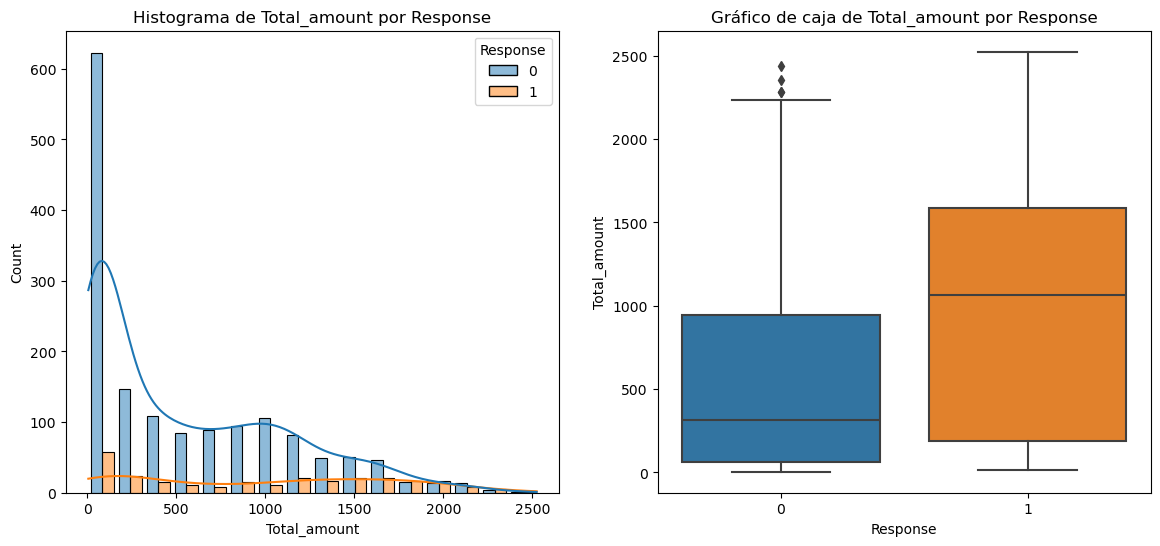

Estadísticos de resumen para Total_amount por Response:
           count    mean     std   min    25%     50%      75%     max
Response                                                              
0         1524.0  540.06  552.74   5.0   62.0   314.0   945.25  2440.0
1          266.0  968.31  712.01  17.0  190.5  1063.0  1584.00  2524.0

Prueba t-student para Total_amount:
Estadístico t: -11.13
p-valor: 0.000
La variable Total_amount está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Response
****************************************


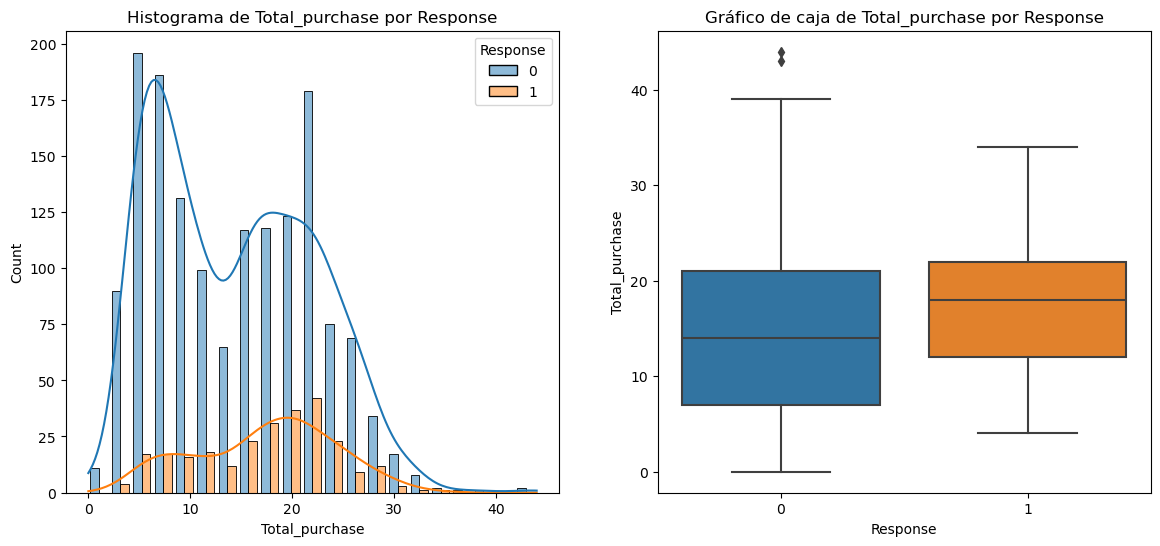

Estadísticos de resumen para Total_purchase por Response:
           count   mean   std  min   25%   50%   75%   max
Response                                                  
0         1524.0  14.37  7.70  0.0   7.0  14.0  21.0  44.0
1          266.0  17.35  6.77  4.0  12.0  18.0  22.0  34.0

Prueba t-student para Total_purchase:
Estadístico t: -5.91
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Median_amount_purchase vs Response
****************************************


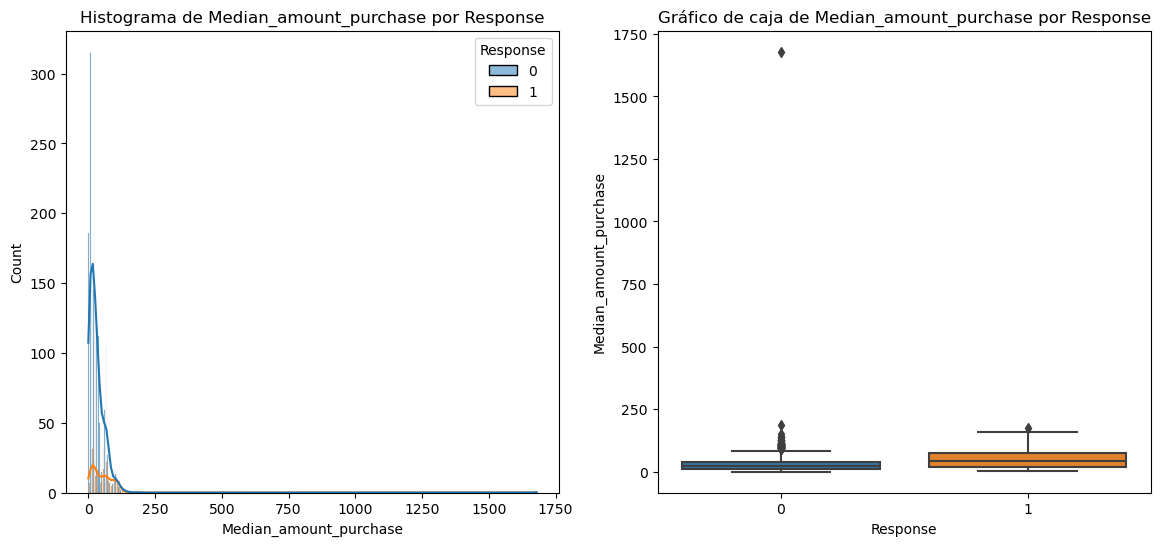

Estadísticos de resumen para Median_amount_purchase por Response:
           count   mean    std   min    25%    50%    75%      max
Response                                                          
0         1524.0  30.64  49.61  0.00   8.86  21.81  39.66  1679.00
1          266.0  50.25  36.08  4.25  16.71  42.93  76.16   173.23

Prueba t-student para Median_amount_purchase:
Estadístico t: -6.17
p-valor: 0.000
La variable Median_amount_purchase está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_cmp vs Response
****************************************


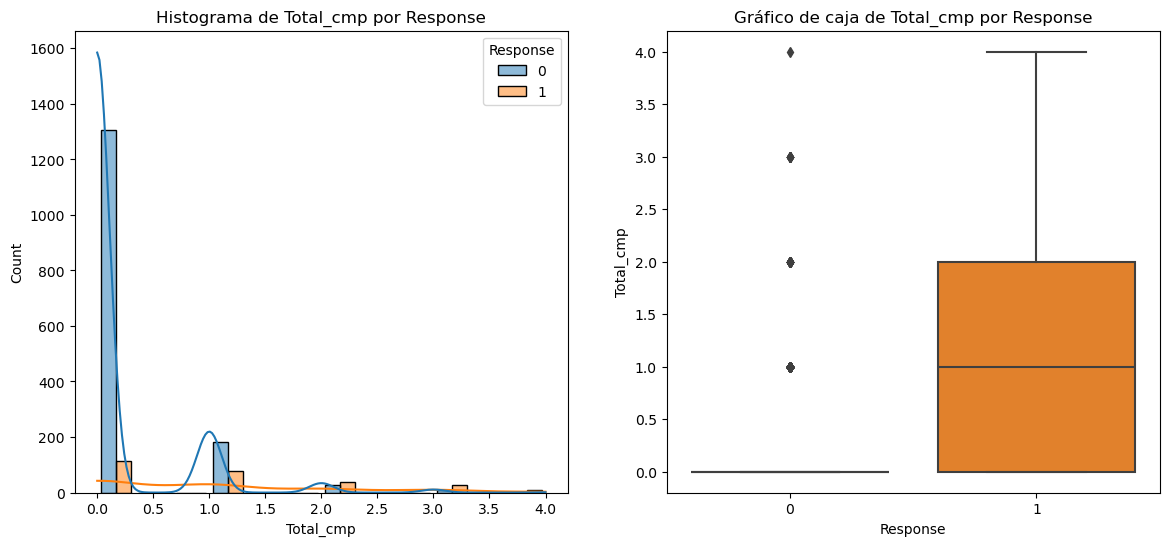

Estadísticos de resumen para Total_cmp por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  0.18  0.47  0.0  0.0  0.0  0.0  4.0
1          266.0  1.00  1.12  0.0  0.0  1.0  2.0  4.0

Prueba t-student para Total_cmp:
Estadístico t: -20.19
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_%_cmp vs Response
****************************************


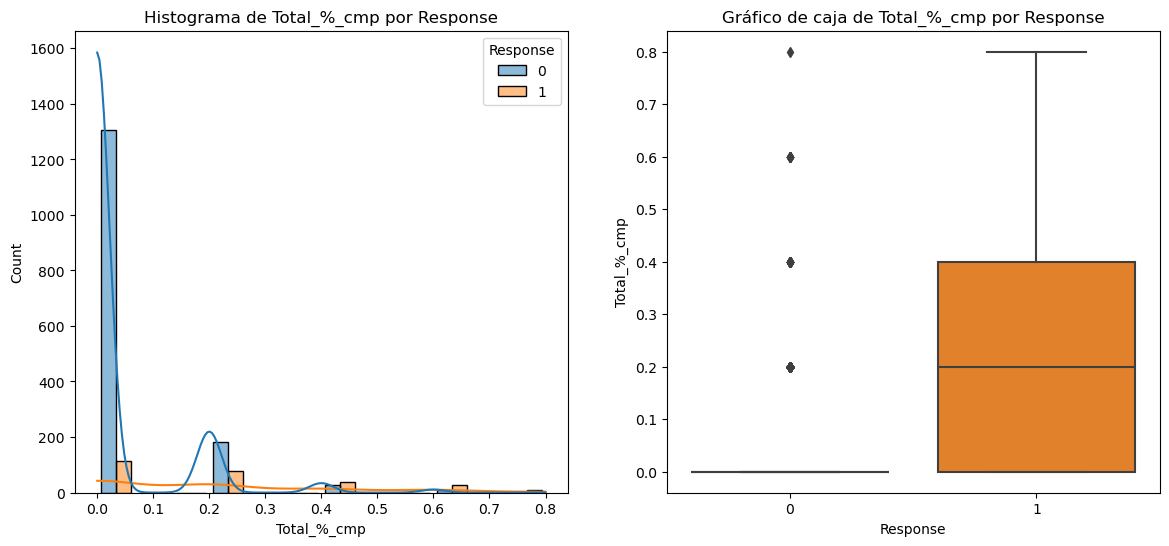

Estadísticos de resumen para Total_%_cmp por Response:
           count  mean   std  min  25%  50%  75%  max
Response                                             
0         1524.0  0.04  0.09  0.0  0.0  0.0  0.0  0.8
1          266.0  0.20  0.22  0.0  0.0  0.2  0.4  0.8

Prueba t-student para Total_%_cmp:
Estadístico t: -20.19
p-valor: 0.000
La variable Total_%_cmp está significativamente asociada con Response (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'Response', 'customes_seniority', 'Household_members', 'Total_amount', 'Total_purchase', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp']
Las features NO correlacionadas son: ['Year_Birth', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age']


In [146]:
analisis_bivariable_numericas_categorica(train_set,target,features_num)

In [147]:
# Selección visual inicial de features:
features_visual_first= ['Income',  'age','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'customes_seniority', 'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp']
features_visual_second= ['Kidhome',  'NumWebVisitsMonth',  'Median_amount_purchase']
features_descart = ['Year_Birth','Teenhome','NumDealsPurchases', 'Total_%_cmp']

___

## Otros análisis entre variables

In [148]:
features_amount = train_set.filter(like='Mnt').columns
features_amount

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [149]:
features_purchase = train_set.filter(like='Purchases').columns
features_purchase

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'],
      dtype='object')

In [150]:
features_cmp = train_set.filter(like='Accepted').columns
features_cmp

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

In [151]:
train_set.groupby(['Education'])[['Income', 'age','Total_amount','Total_purchase','Total_cmp','Recency', 'Household_members','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds',]].agg('mean').sort_values('Income', ascending=False).round(2)

,Income,age,Total_amount,Total_purchase,Total_cmp,Recency,Household_members,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,,,,,,,,
PhD,55297.90,48.76,675.82,15.70,0.33,49.06,2.66,409.46,19.42,168.63,26.66,19.93,31.72
Master,52407.82,48.35,591.05,14.78,0.26,47.89,2.67,319.68,21.44,156.71,32.32,20.34,40.56
Graduation,51894.63,44.99,616.25,14.93,0.31,49.88,2.58,281.80,30.83,178.85,43.42,31.39,49.96
2n Cycle,48637.11,42.55,533.66,14.35,0.29,46.78,2.51,218.33,30.04,152.99,48.55,35.02,48.74
Basic,20543.30,36.46,86.83,7.07,0.11,48.74,2.28,7.98,12.00,12.26,17.67,13.28,23.63


In [152]:
train_set.groupby(['Marital_Status'])[['Income', 'age','Total_amount','Total_purchase','Total_cmp','Recency', 'Household_members','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].agg('max').sort_values('Income', ascending=False).round(2)

,Income,age,Total_amount,Total_purchase,Total_cmp,Recency,Household_members,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,,,,,,,,
Divorced,102160.0,71.0,2074,33,4,99,4.0,1459,172,932,225,189,242
Married,102160.0,71.0,2440,44,4,99,5.0,1493,194,1725,254,197,321
Single,102160.0,71.0,2349,32,4,99,4.0,1324,199,974,250,263,362
Together,102160.0,70.0,2524,39,4,99,5.0,1492,185,1607,258,194,241
Widow,85620.0,71.0,2088,31,3,98,3.0,1462,194,925,259,191,224
Others,79244.0,58.0,1216,22,2,58,1.0,471,102,500,212,61,245
Alone,61331.0,57.0,632,23,1,42,3.0,534,7,47,19,14,41


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_7588\2857359751.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


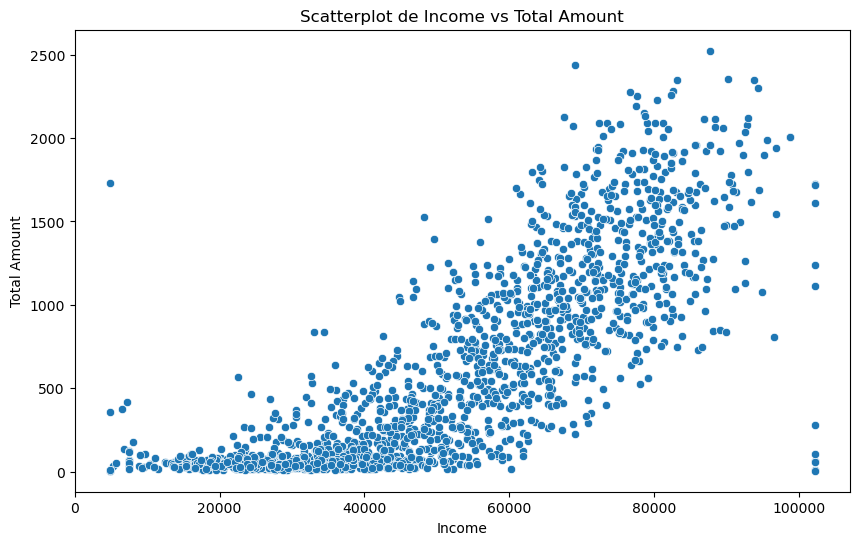

In [160]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el scatterplot
sns.scatterplot(
    data=train_set,
    x='Income', 
    y='Total_amount',
    palette='viridis', 
    )

# Títulos y etiquetas
plt.title('Scatterplot de Income vs Total Amount')
plt.xlabel('Income')
plt.ylabel('Total Amount')

# Mostramos el gráfico
plt.show()